# Import Libraries

In [ ]:
# Dealing with matrix
import numpy as np
import math
# Iterators
from collections import Counter
from itertools import cycle
# Manipulating with csv files, and create charts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data Cleaning using Regular Expression and String function
import re
import string
from string import punctuation
from bs4 import BeautifulSoup
# Dealing with texts
from datetime import datetime
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud
# Dealing with hyperparameters
from sklearn.feature_selection import chi2, RFE, f_classif
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingGridSearchCV, learning_curve, cross_val_predict
# Dealing with data distribution
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
# Ensembles
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
# Classifiers
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Metrics
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, precision_score, classification_report, confusion_matrix, roc_curve, auc
# NLTK packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Fetch Data

In [ ]:
# Read and fetch data.
PATH = "/content/sentiment_tweets3.csv"
fetched_data = pd.read_csv(PATH)

## About the dataset

**General info about the dataset:**
* About:\
This data set contains three columns:
1. Index -- (Integer type)
2. message to examine -- (String type)
3. label (depression result) -- (Integer type, had label encoder process, or labelled 0, 1 indicated the depression)
* Context:\
Finding if a person is depressed from their use of words on social media can definitely help in the cure!

# Some EDA

In [ ]:
# Preview the first 5 rows.
fetched_data.head()

Index                                 message to examine  \
0    106  just had a real good moment. i missssssssss hi...   
1    217         is reading manga  http://plurk.com/p/mzp1e   
2    220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3    288  @lapcat Need to send 'em to my accountant tomo...   
4    540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   

   label (depression result)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [ ]:
# Rename label column.
fetched_data.rename(columns = {'message to examine':'Tweet', 'label (depression result)':'Sentiment'}, inplace = True)

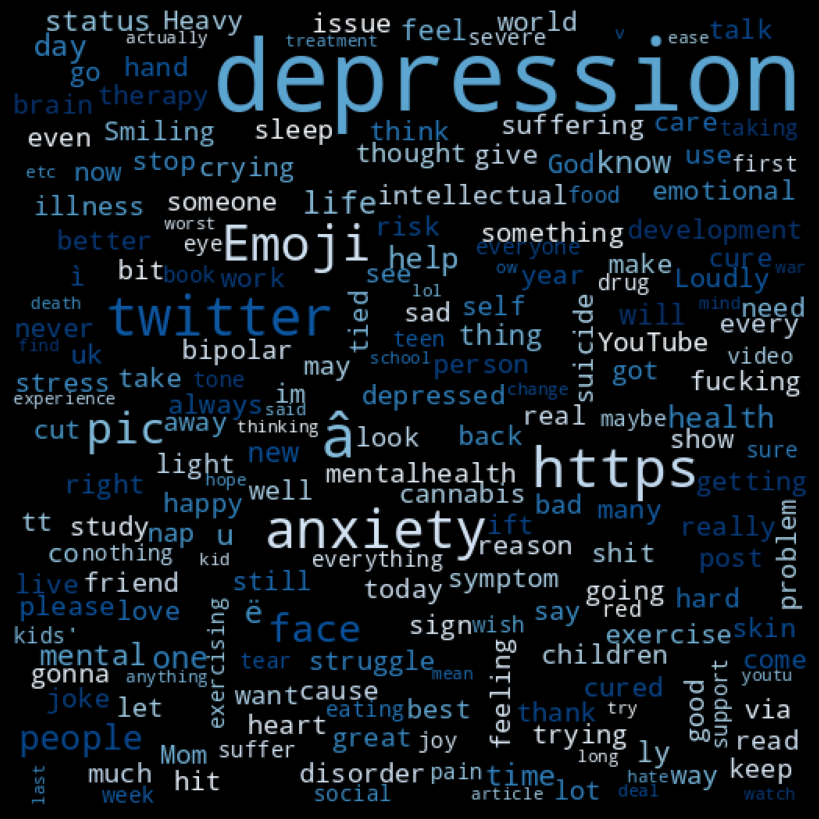

In [ ]:
depressive_words = ' '.join(list(fetched_data[fetched_data['Sentiment'] == 1]['Tweet']))
depressive_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

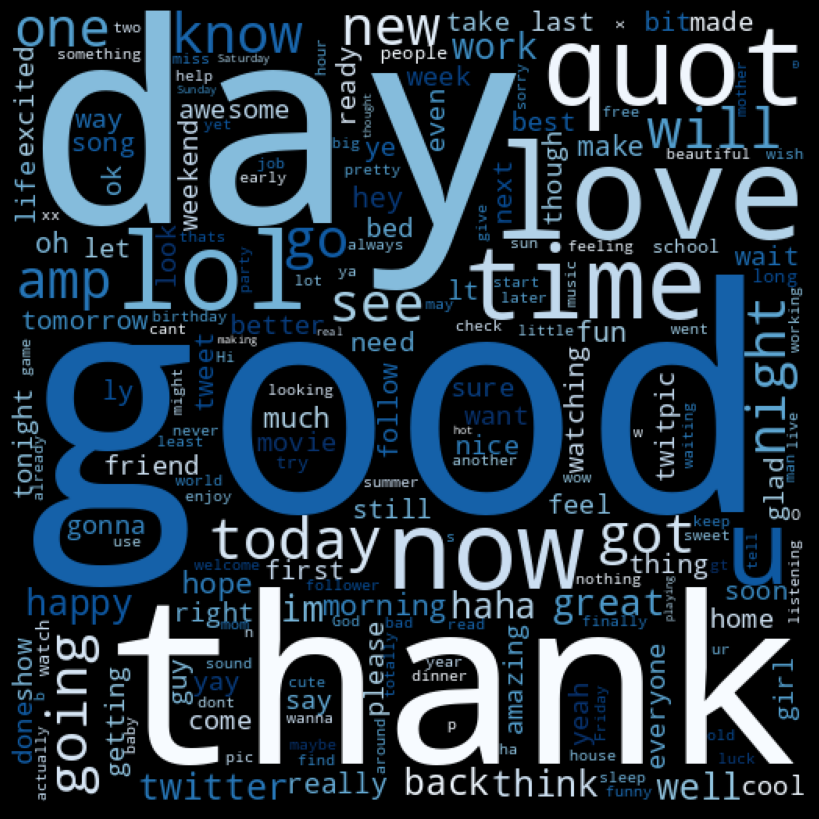

In [ ]:
depressive_words = ' '.join(list(fetched_data[fetched_data['Sentiment'] == 0]['Tweet']))
depressive_words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_words)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Get more info about the data.
fetched_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      10314 non-null  int64 
 1   Tweet      10314 non-null  object
 2   Sentiment  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


**Discussion Stage**
* From the data table, and data info, we can clearly insure that target column have been solved using Label Encoder.

In [ ]:
# Check the shape of the data.
fetched_data.shape

(10314, 3)

In [ ]:
fetched_data["Sentiment"].value_counts(normalize=True)

0    0.775645
1    0.224355
Name: Sentiment, dtype: float64

**Discussion Stage**
* Here we can see that the Negative class has more samples than the Positive class, thus, we can to deal with it through metric or deal with imbalanced data.

In [ ]:
# Remove index column.
data = fetched_data.drop("Index", axis = 1)

**Discussion Stage**
* I dropped the index column because after some EDA, the result ensure to be useless.

In [ ]:
# Show the first 5 rows.
data.head()

Tweet  Sentiment
0  just had a real good moment. i missssssssss hi...          0
1         is reading manga  http://plurk.com/p/mzp1e          0
2  @comeagainjen http://twitpic.com/2y2lx - http:...          0
3  @lapcat Need to send 'em to my accountant tomo...          0
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0

In [ ]:
class_samples = data.groupby('Sentiment').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
class_samples.style.background_gradient(cmap='winter')

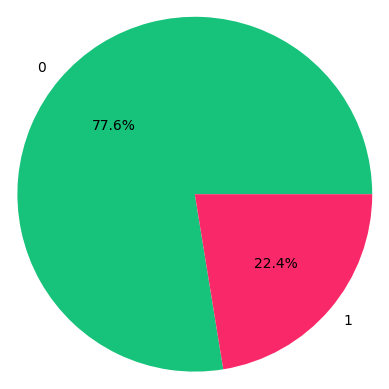

In [ ]:
colors = ['#17C37B','#F92969','#FACA0C', '#FF3B49', '#26DE81']
plt.pie(class_samples.Tweet, radius = 1.2,labels= class_samples.Sentiment, colors=colors,autopct="%.1f%%")
plt.show()

**Discussion Stage**
* Here we can notice the big difference between the 2 classes.

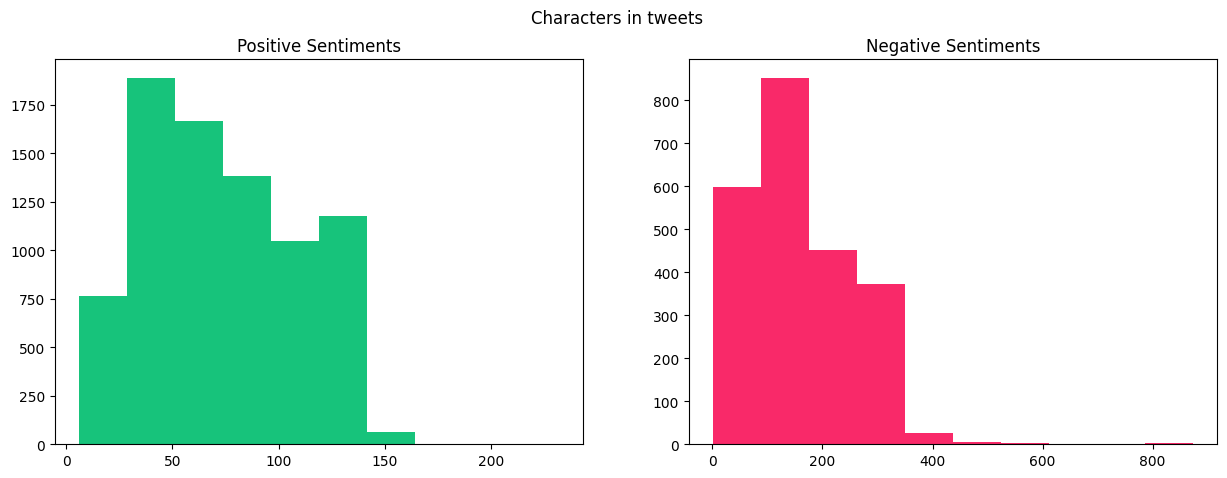

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=data[data['Sentiment']==0]['Tweet'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=data[data['Sentiment']==1]['Tweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

# Data Cleaning

In [ ]:
# To understand the preprocessing steps we have to create a sample text array and do the processing.
sample = data["Tweet"].sample(n=10)
sample

8414     all sorts of anxiety and depression are meetin...
1086     @rescapism hahahah tell me about it tomorrow t...
5839     @SaraLHValo  Oh I'm so glad to hear that!!!  E...
9779     Poor recognition of #depression and #anxiety i...
8810     The best cure for worry, depression, melanchol...
7998     lol. i just realized my room has a color theme...
1640     @naor No bud, the heat is not to blame. It's j...
7453     El Patron and his fiancÃ©e are cooking sharlotka 
10165    Almost feel like myself again <Emoji: Smiling ...
747      damn, youtube has deleted it . when i do, i'll...
Name: Tweet, dtype: object

## Remove HTMLs

In [ ]:
# Remove HTMLs tags.
def remove_htmls(text):
  '''Remove HTMLs tags'''
  return BeautifulSoup(text, "lxml").text

In [ ]:
remove_html = sample.apply(remove_htmls)
remove_html

<ipython-input-16-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


8414     all sorts of anxiety and depression are meetin...
1086     @rescapism hahahah tell me about it tomorrow t...
5839     @SaraLHValo  Oh I'm so glad to hear that!!!  E...
9779     Poor recognition of #depression and #anxiety i...
8810     The best cure for worry, depression, melanchol...
7998     lol. i just realized my room has a color theme...
1640     @naor No bud, the heat is not to blame. It's j...
7453     El Patron and his fiancÃ©e are cooking sharlotka 
10165    Almost feel like myself again Depression is no...
747      damn, youtube has deleted it . when i do, i'll...
Name: Tweet, dtype: object

In [ ]:
# Part of the process of data cleaning.
preprocess_track = {"remove_html" :
                    remove_html}

## Remove URLs

In [ ]:
# Remove urls tags.
def remove_urls(text):
  '''Remove urls tags'''
  pattern = r'http[^\s]*'
  return re.sub(pattern, '', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_urls"] = sample.apply(remove_urls)

## Remove Images

In [ ]:
def remove_images(text):
  '''Remove Images'''
  text = re.sub(r"pic\.twitter\.com/\S+",'', text)
  text = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", text)
  return text

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_images"] = sample.apply(remove_images)

## Remove mentions

In [ ]:
# Remove Mention.
def remove_mention(text):
  '''Remove Mention'''
  pattern = r"@\S+"
  return re.sub(pattern, '', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_mention"] = sample.apply(remove_mention)

## Remove Emoji

In [ ]:
# Function to remove emoji.
def remove_emoji(text):
  '''Function to remove emoji'''
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_emoji"] = sample.apply(lambda x: remove_emoji(str(x)))
preprocess_track["remove_emoji"]

8414     all sorts of anxiety and depression are meetin...
1086     @rescapism hahahah tell me about it tomorrow t...
5839     @SaraLHValo  Oh I'm so glad to hear that!!!  E...
9779     Poor recognition of #depression and #anxiety i...
8810     The best cure for worry, depression, melanchol...
7998     lol. i just realized my room has a color theme...
1640     @naor No bud, the heat is not to blame. It's j...
7453     El Patron and his fiancÃ©e are cooking sharlotka 
10165    Almost feel like myself again <Emoji: Smiling ...
747      damn, youtube has deleted it . when i do, i'll...
Name: Tweet, dtype: object

## Remove Emoticons

In [ ]:
# Function for removing emoticons.
def remove_emoticons(text):
  '''Function for removing emoticons'''
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"  # emoticons
  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
  u"\U0001F680-\U0001F6FF"  # transport & map symbols
  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
  u"\U0001F1F2-\U0001F1F4"  # Macau flag
  u"\U0001F1E6-\U0001F1FF"  # flags
  u"\U0001F600-\U0001F64F"
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  u"\U0001f926-\U0001f937"
  u"\U0001F1F2"
  u"\U0001F1F4"
  u"\U0001F620"
  u"\u200d"
  u"\u2640-\u2642"
  "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'',text)
  return text

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_emoticons"] = sample.apply(remove_emoticons)

## Remove non-ASCII character

In [ ]:
# Remove Mention.
def remove_non_ascii(text):
  '''Remove Mention'''
  return ''.join(i for i in text if i in string.printable)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_non_ascii"] = sample.apply(remove_non_ascii)

## Remove Punctuation

In [ ]:
# Remove Punctuation.
def remove_punctuation(text):
  '''Remove Punctuation'''
  return re.sub('[%s]' % re.escape(string.punctuation), '', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_punctuation"] = sample.apply(remove_punctuation)

## Remove Extra Alphabatic characters

In [ ]:
# Remove more than one alphabatic characters.
def remove_extra_alphabatic(text):
  '''Remove more than one alphabatic characters'''
  pattern = r'(.{2})\1+'
  return re.sub(pattern, r'\1', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_extra_alphabatic"] = sample.apply(remove_extra_alphabatic)

## Remove first and  end spaces

In [ ]:
# Remove first and end spaces.
def remove_first_end_spaces(string):
  '''Remove first and end spaces'''
  return "".join(string.rstrip().lstrip())

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_first_and_end_spaces"] = sample.apply(remove_first_end_spaces)

## Remove Numbers

In [ ]:
# Remove Numbers.
def remove_numbers(text):
  '''Remove Numbers'''
  text = re.sub(r'[d]+', r'', text)
  text = re.sub(r'[0-9]*','',text)
  text = re.sub(r'([0-9]*\-[0-9]*)*', '', text)
  return text

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_numbers"] = sample.apply(remove_numbers)

## Convert text words to lower case

In [ ]:
# Part of the process of data cleaning.
preprocess_track["lower_case"] = sample.apply(lambda text_word: text_word.lower())

## Remove single character

In [ ]:
# Remove single char.
def remove_single_char(text):
  '''Remove the left single char'''
  return re.sub (' (\b [A-Za-z] \b|\b [A-Za-z]\b)', '', text)

In [ ]:
# Part of the process of data cleaning.
preprocess_track["remove_single_char"] = sample.apply(remove_single_char)

# Data Preprocessing

## Remove stop words

In [ ]:
english_stop_words = set(stopwords.words('english'))
english_stop_words.update(punctuation)

In [ ]:
# Remove stop words.
def remove_stop_words(text):
  '''Remove stop words'''
  return ' '.join([word for word in word_tokenize(text) if word not in english_stop_words])

In [ ]:
preprocess_track['remove_stop_words'] = sample.apply(remove_stop_words)

## Lemmatization

In [ ]:
# Create Lemmatizer Object.
wnl = WordNetLemmatizer()

In [ ]:
# Lemmatize word in sentences.
def lemmatize(s):
  '''Lemmatize word in sentences'''
  s = [wnl.lemmatize(word.strip(), pos='v') for word in TweetTokenizer().tokenize(s)]
  return s
preprocess_track['lemmatize'] = sample.apply(lemmatize)

## Stemming

In [ ]:
# Create Stemmer Object.
stemmer = PorterStemmer()

In [ ]:
# Stem word in sentences.
def stemmer_func(s):
  '''Stem word in sentences'''
  s = [stemmer.stem(word.strip()) for word in TweetTokenizer().tokenize(s)]
  return s
preprocess_track['stem'] = sample.apply(lambda x: stemmer_func(x))

**Visualize Preprocessing steps**

In [ ]:
# Create and print the dataframe.
preprocess_track_df = pd.DataFrame(preprocess_track)
preprocess_track_df

remove_html  \
8414   all sorts of anxiety and depression are meetin...   
1086   @rescapism hahahah tell me about it tomorrow t...   
5839   @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640   @naor No bud, the heat is not to blame. It's j...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again Depression is no...   
747    damn, youtube has deleted it . when i do, i'll...   

                                             remove_urls  \
8414   all sorts of anxiety and depression are meetin...   
1086   @rescapism hahahah tell me about it tomorrow t...   
5839   @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640   @naor No bud, the heat is not to blame. It's j...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again <Emoji: Smiling ...   
747    damn, youtube has deleted it . when i do, i'll...   

                                           remove_images  \
8414   all sorts of anxiety and depression are meetin...   
1086   @rescapism hahahah tell me about it tomorrow t...   
5839   @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640   @naor No bud, the heat is not to blame. It's j...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again <Emoji: Smiling ...   
747    damn, youtube has deleted it . when i do, i'll...   

                                          remove_mention  \
8414   all sorts of anxiety and depression are meetin...   
1086             hahahah tell me about it tomorrow then    
5839     Oh I'm so glad to hear that!!!  Each day fin...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640    No bud, the heat is not to blame. It's just o...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again <Emoji: Smiling ...   
747    damn, youtube has deleted it . when i do, i'll...   

                                            remove_emoji  \
8414   all sorts of anxiety and depression are meetin...   
1086   @rescapism hahahah tell me about it tomorrow t...   
5839   @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640   @naor No bud, the heat is not to blame. It's j...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again <Emoji: Smiling ...   
747    damn, youtube has deleted it . when i do, i'll...   

                                        remove_emoticons  \
8414   all sorts of anxiety and depression are meetin...   
1086   @rescapism hahahah tell me about it tomorrow t...   
5839   @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779   Poor recognition of #depression and #anxiety i...   
8810   The best cure for worry, depression, melanchol...   
7998   lol. i just realized my room has a color theme...   
1640   @naor No bud, the heat is not to blame. It's j...   
7453   El Patron and his fiancÃ©e are cooking sharlotka    
10165  Almost feel like myself again <Emoji: Smiling ...   
747    damn, youtube has deleted it . when i do, i'll...   

                                        remove_non_ascii  \
8414   all sorts of

**Discussion Stage**
* Here we can see the effect of each step on the data.

## **Applying all functions**

In [ ]:
def process_text_data(text_data):
    '''Applying Remove HTMLs, Remove URLs, Remove Images, Remove mentions, Remove Emoji, Remove Emoticons
    Remove non-ASCII character, Remove Punctuation, Remove Extra Alphabatic characters, Remove first and end spaces,
    Remove Numbers, Convert text words to lower case, Remove single character, and Remove stop words functions'''
    text_data = (text_data
                 .apply(lambda word : word.lower())
                 .apply(remove_urls)
                 .apply(remove_htmls)
                 .apply(remove_images)
                 .apply(remove_mention)
                 .apply(remove_emoji)
                 .apply(remove_emoticons)
                 .apply(remove_punctuation)
                 .apply(remove_non_ascii)
                 .apply(remove_first_end_spaces)
                 .apply(remove_extra_alphabatic)
                 .apply(remove_single_char)
                 .apply(remove_stop_words)
                 .apply(remove_numbers)
                #  .apply(lemmatize)
                 )
    
    return text_data

In [ ]:
# lets try this out using the sample data.

processed_sample = process_text_data(sample)

data_processing_sample = pd.DataFrame(data={'Before text processing':sample,
                                            'After text processing':processed_sample})

data_processing_sample.head()

<ipython-input-16-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


Before text processing  \
8414  all sorts of anxiety and depression are meetin...   
1086  @rescapism hahahah tell me about it tomorrow t...   
5839  @SaraLHValo  Oh I'm so glad to hear that!!!  E...   
9779  Poor recognition of #depression and #anxiety i...   
8810  The best cure for worry, depression, melanchol...   

                                  After text processing  
8414                 sorts anxiety epression meeting ha  
1086                                  hah tell tomorrow  
5839  oh im gla hear ay fin something thankful forba...  
9779  poor recognition epression anxiety associate r...  
8810  best cure worry epression melancholy brooing g...

## Perform Training data and Validation sets

In [ ]:
# Preprocessed data.
training_data = process_text_data(data["Tweet"])

<ipython-input-16-862a90022783>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


In [ ]:
# Convert the data again to dataframe.
data_processing = pd.DataFrame(data={'Tweet':training_data})

In [ ]:
# Concatenating along columns.
data_processing = pd.concat([data_processing, data["Sentiment"]], axis=1)

In [ ]:
# Clear empty lists.
training_data = data_processing[data_processing.astype(str)['Tweet'] != '[]']

In [ ]:
# Reset index as a final step in preprocess step.
training_data.reset_index(drop= True, inplace = True)

In [ ]:
# Print the last 5 samples in the data.
training_data.tail()

Tweet  Sentiment
10309  epression g herbo moo im one stressing people ...          1
10310  epression succumbs brain makes feel like youll...          1
10311  ketamine nasal spray shows promise epression s...          1
10312            ont mistake ba ay epression everyone em          1
10313                                                             1

In [ ]:
# Checking null vallues present.
training_data.isna().sum()

Tweet        0
Sentiment    0
dtype: int64

In [ ]:
print(f'{training_data.shape} is the shape of the data')
print(f'Description: \n{training_data.describe()}')

(10314, 2) is the shape of the data
Description: 
          Sentiment
count  10314.000000
mean       0.224355
std        0.417177
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


# Deep EDA

**Discussion Stage**
* We could do an auto corrector to correct mis-spelling grammatical error, and etc. by human typing though the tweets in the dataset, but I prefer to not use any effect on the human error in typing in this situation, this depends on the future performance optimization, in that case I could edit this step and use auto correct.

## Find Sents, Tokens, Lemma, POS, and NER

In [ ]:
# Place holder variabels.
sents = []
tokens = []
lemma = []
pos = []
ner = []

nlp = spacy.load('en_core_web_sm')
# Configure time variable.
t0 = datetime.now()

for tweet in nlp.pipe(training_data["Tweet"], batch_size = 32, n_process=3):
    if tweet.is_parsed:
        tokens.append([e.text for e in tweet])
        sents.append([sent.text.strip() for sent in tweet.sents])
        pos.append([e.pos_ for e in tweet])
        ner.append([e.text for e in tweet.ents])
        lemma.append([n.lemma_ for n in tweet])
    else:
        # We want to make sure that the lists of parsed results have the same number of entries of the original Dataframe, so add some blanks in case the parse fails.
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

training_data['tokens'] = tokens
training_data['lemma'] = lemma
training_data['pos'] = pos
training_data['sents'] = sents
training_data['ner'] = ner
# Compute process time.
t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

<ipython-input-60-18bbe815cf5c>:13: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if tweet.is_parsed:


Processing time: 0:00:52.076992


In [ ]:
# Print the first 5 rows.
training_data.head()

Tweet  Sentiment  \
0                          real goo moment miss much          0   
1                                       reaing manga          0   
2                                                             0   
3  nee sen em accountant tomorrow oly wasnt even ...          0   
4                     a myspace myspacecomlookthuner          0   

                                              tokens  \
0                    [real, goo, moment, miss, much]   
1                                    [reaing, manga]   
2                                                 []   
3  [nee, sen, em, accountant, tomorrow, oly, was,...   
4                 [a, myspace, myspacecomlookthuner]   

                                               lemma  \
0                    [real, goo, moment, miss, much]   
1                                      [reae, manga]   
2                                                 []   
3  [nee, sen, em, accountant, tomorrow, oly, be, ...   
4                 [a, myspace, myspacecomlookthuner]   

                                                 pos  \
0                       [ADJ, NOUN, NOUN, VERB, ADJ]   
1                                        [VERB, ADV]   
2                                                 []   
3  [PROPN, PROPN, PROPN, PROPN, NOUN, NOUN, AUX, ...   
4                                  [DET, NOUN, NOUN]   

                                               sents                  ner  
0                        [real goo moment miss much]                   []  
1                                     [reaing manga]       [reaing manga]  
2                                                 []                   []  
3  [nee sen em accountant tomorrow oly wasnt even...  [nee sen, tomorrow]  
4                   [a myspace myspacecomlookthuner]                   []

In [ ]:
# Lemmatized and re-joined.
training_data['Lemmatized_Tweet'] = training_data['lemma'].apply(' '.join)

## Find the best N-Grams

In [ ]:
def find_ngrams(data):
  class_text = " ".join(data.tolist())
  tokens= TweetTokenizer().tokenize(class_text)
  # unigram
  print('uni_gram -> HighFreq:')
  unigram_freq = nltk.ngrams(tokens, 1)
  unigram_freq=nltk.FreqDist(unigram_freq)
  print(unigram_freq.most_common()[:10])
  print('uni_gram -> LowFreq:')
  print(unigram_freq.most_common()[-10:])
  print('\n')
  
  # bigram
  print('bi_gram -> HighFreq:')
  bigram_freq = nltk.ngrams(tokens, 2)
  bigram_freq=nltk.FreqDist(bigram_freq)
  print(bigram_freq.most_common()[:10])
  print('bi_gram -> LowFreq:')
  print(bigram_freq.most_common()[-10:])
  print('\n')
    
  # trigram
  print('tri_gram -> HighFreq:')
  trigram_freq = nltk.ngrams(tokens, 3)
  trigram_freq=nltk.FreqDist(trigram_freq)
  print(trigram_freq.most_common()[:10])
  print('tri_gram -> LowFreq:')
  print(trigram_freq.most_common()[-10:])

In [ ]:
find_ngrams(training_data['Lemmatized_Tweet'])

uni_gram -> HighFreq:
[(('epression',), 2303), (('I',), 1202), (('go',), 1074), (('m',), 1070), (('get',), 994), (('goo',), 693), (('love',), 649), (('like',), 591), (('ay',), 589), (('not',), 524)]
uni_gram -> LowFreq:
[(('reams',), 1), (('strayki',), 1), (('maga',), 1), (('trickle',), 1), (('gteen',), 1), (('bharatu',), 1), (('provoke',), 1), (('persistent',), 1), (('nagging',), 1), (('herbo',), 1)]


bi_gram -> HighFreq:
[(('I', 'm'), 969), (('can', 'not'), 245), (('that', 's'), 208), (('you', 're'), 194), (('I', 've'), 166), (('be', 'not'), 152), (('go', 'to'), 146), (('epression', 'anxiety'), 142), (('anxiety', 'epression'), 140), (('m', 'go'), 115)]
bi_gram -> LowFreq:
[(('stress', 'people'), 1), (('epression', 'succumb'), 1), (('succumb', 'brain'), 1), (('brain', 'make'), 1), (('ll', 'never'), 1), (('never', 'enough'), 1), (('enough', 'ketamine'), 1), (('health', 'ont'), 1), (('mistake', 'ba'), 1), (('everyone', 'em'), 1)]


tri_gram -> HighFreq:
[(('I', 'm', 'go'), 115), (('can

**Discussion Stage**
* Here, we can analyse the best N-Gram to choose.

In [ ]:
# Checking the first 10 most frequent words.
cn_obj = Counter()
for text in training_data['Tweet'].values:
    for word in text.split():
        cn_obj[word] += 1
cn_obj.most_common(20)

[('epression', 2300),
 ('im', 1043),
 ('goo', 693),
 ('love', 603),
 ('like', 578),
 ('ay', 577),
 ('get', 484),
 ('one', 464),
 ('go', 452),
 ('lol', 412),
 ('ont', 409),
 ('know', 403),
 ('time', 402),
 ('going', 371),
 ('got', 365),
 ('thanks', 362),
 ('anxiety', 361),
 ('u', 358),
 ('toay', 353),
 ('ha', 337)]

In [ ]:
cn_obj.most_common()[-20:]

[('survivors', 1),
 ('okbmp', 1),
 ('jpeg', 1),
 ('epressiongoo', 1),
 ('nityanam', 1),
 ('shree', 1),
 ('healthnews', 1),
 ('fvck', 1),
 ('sacrifices', 1),
 ('maga', 1),
 ('trickle', 1),
 ('trillions', 1),
 ('gteens', 1),
 ('olls', 1),
 ('bharatu', 1),
 ('provoking', 1),
 ('persistent', 1),
 ('nagging', 1),
 ('herbo', 1),
 ('succumbs', 1)]

**Discussion Stage**
* Here we can see the most common words, son we can that insight about the benefits of their counts.

# Preprocess and modeling

**Build essential functions**

### **Split the Data**

In [ ]:
# Create training and labels dataframe.
train_data = training_data.Tweet.astype(str)
labels_data = training_data.Sentiment

In [ ]:
def split_by_victorizer(training_vector, labels_data, test_size):
  # Split the data using stratified split.
  training_data, val_data, training_labels, val_labels = train_test_split(training_vector, labels_data, 
                                                    test_size= test_size, random_state= 42, shuffle=True, stratify= labels_data
                                                    )
  return training_data, val_data, training_labels, val_labels

## Vectorizing

## Count Vectorizer

In [ ]:
# Create a Vectorizer Object
count_vectorizer = CountVectorizer(analyzer = 'word', stop_words = 'english', ngram_range=(1, 3))
 
count_vectorizer.fit(train_data, labels_data)
 
# Printing the identified Unique words along with their indices
print("Vocabulary: ", count_vectorizer.vocabulary_)
 
# Encode the Document
count_vector = count_vectorizer.transform(train_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**split `Count` Vectorizer data**

In [ ]:
TEST_SIZE = 0.2
count_training_data, count_val_data, count_training_labels, count_val_labels = split_by_victorizer(count_vector, labels_data, TEST_SIZE)

### Processing imbalanced target in data

In [ ]:
count_training_labels.value_counts()

0    6400
1    1851
Name: Sentiment, dtype: int64

**Discussion Stage**
* As we saw, there is a huge difference between the frequent of classes.
* We will do upsambling.

In [ ]:
print(f'''
      The shape of training data before upsampling is: {count_training_data.shape},
      The shape of validation data before upsampling is: {count_val_data.shape},
      The shape of training labels before upsampling is: {count_training_labels.shape},
      The shape of validation labels before upsampling is: {count_val_labels.shape},
      ''')


      The shape of training data before upsampling is: (8251, 121485),
      The shape of validation data before upsampling is: (2063, 121485),
      The shape of training labels before upsampling is: (8251,),
      The shape of validation labels before upsampling is: (2063,),
      


In [ ]:
# Transform the dataset.
oversample = SMOTE(random_state= 42)
count_training_data, count_training_labels = oversample.fit_resample(count_training_data, count_training_labels)

In [ ]:
print(f'''
      The shape of training data after upsampling is: {count_training_data.shape},
      The shape of validation data after upsampling is: {count_val_data.shape},
      The shape of training labels after upsampling is: {count_training_labels.shape},
      The shape of validation labels after upsampling is: {count_val_labels.shape}
      ''')


      The shape of training data after upsampling is: (12800, 121485),
      The shape of validation data after upsampling is: (2063, 121485),
      The shape of training labels after upsampling is: (12800,),
      The shape of validation labels after upsampling is: (2063,)
      


In [ ]:
# Check labels count.
count_training_labels.value_counts()

0    6400
1    6400
Name: Sentiment, dtype: int64

## TF-IDF Vectorizer

In [ ]:
# Create Vectorizer Object.
vectorizer = TfidfVectorizer(min_df=7, max_df=0.7, ngram_range=(1, 3))
# fit and transform it on training data.
tfidf_vector  = vectorizer.fit_transform(train_data) 

**split `TF-IDF` Vectorizer data**

In [ ]:
TEST_SIZE = 0.2
tfidf_training_data, tfidf_val_data, tfidf_training_labels, tfidf_val_labels = split_by_victorizer(tfidf_vector, labels_data, TEST_SIZE)

### Processing imbalanced target in data

In [ ]:
tfidf_val_labels.value_counts()

0    1600
1     463
Name: Sentiment, dtype: int64

**Discussion Stage**
* As we saw, there is a huge difference between the frequent of classes.
* We will do upsambling.

In [ ]:
print(f'''
      The shape of training data before upsampling is: {tfidf_training_data.shape},
      The shape of validation data before upsampling is: {tfidf_val_data.shape},
      The shape of training labels before upsampling is: {tfidf_training_labels.shape},
      The shape of validation labels before upsampling is: {tfidf_val_labels.shape},
      ''')


      The shape of training data before upsampling is: (8251, 2138),
      The shape of validation data before upsampling is: (2063, 2138),
      The shape of training labels before upsampling is: (8251,),
      The shape of validation labels before upsampling is: (2063,),
      


In [ ]:
# Transform the dataset.
oversample = SMOTE(random_state= 42)
tfidf_training_data, tfidf_training_labels = oversample.fit_resample(tfidf_training_data, tfidf_training_labels)

In [ ]:
print(f'''
      The shape of training data after upsampling is: {tfidf_training_data.shape},
      The shape of validation data after upsampling is: {tfidf_val_data.shape},
      The shape of training labels after upsampling is: {tfidf_training_labels.shape},
      The shape of validation labels after upsampling is: {tfidf_val_labels.shape}
      ''')


      The shape of training data after upsampling is: (12800, 2138),
      The shape of validation data after upsampling is: (2063, 2138),
      The shape of training labels after upsampling is: (12800,),
      The shape of validation labels after upsampling is: (2063,)
      


In [ ]:
tfidf_training_labels.value_counts()

0    6400
1    6400
Name: Sentiment, dtype: int64

## Word2Vec

In [ ]:
# Create CBOW model.
# sentences = [sentence.encode('utf-8') for sentence in word2vec_training_data]
w2v_model = gensim.models.Word2Vec(train_data, min_count = 2,
                              vector_size = 100, window = 5)

In [ ]:
TEST_SIZE = 0.2
word2vec_training_data, word2vec_val_data, word2vec_training_labels, word2vec_val_labels = split_by_victorizer(train_data, labels_data, TEST_SIZE)

### Processing imbalanced target in data

In [ ]:
word2vec_training_labels.value_counts()

0    6400
1    1851
Name: Sentiment, dtype: int64

**Discussion Stage**
* As we saw, there is a huge difference between the frequent of classes.
* We will do upsambling.

In [ ]:
print(f'''
      The shape of training data before upsampling is: {word2vec_training_data.shape},
      The shape of validation data before upsampling is: {word2vec_val_data.shape},
      The shape of training labels before upsampling is: {word2vec_training_labels.shape},
      The shape of validation labels before upsampling is: {word2vec_val_labels.shape},
      ''')


      The shape of training data before upsampling is: (8251,),
      The shape of validation data before upsampling is: (2063,),
      The shape of training labels before upsampling is: (8251,),
      The shape of validation labels before upsampling is: (2063,),
      


In [ ]:
w2v_model.wv.index_to_key

[' ',
 'e',
 'o',
 'a',
 'i',
 's',
 'n',
 't',
 'r',
 'l',
 'g',
 'h',
 'm',
 'c',
 'p',
 'y',
 'u',
 'w',
 'k',
 'b',
 'f',
 'v',
 'x',
 'j',
 'z',
 'q']

In [ ]:
words = set(w2v_model.wv.index_to_key )
word2vec_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in word2vec_training_data])
word2vec_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in word2vec_val_data])

<ipython-input-88-c197827309ec>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  word2vec_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in word2vec_training_data])
<ipython-input-88-c197827309ec>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  word2vec_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in word2vec_val_data])


In [ ]:
for i, v in enumerate(word2vec_train_vect):
    print(len(word2vec_training_data.iloc[i]), len(v))

Streaming output truncated to the last 5000 lines.
83 83
71 71
36 36
90 90
107 107
44 44
30 30
41 41
23 23
50 50
62 62
55 55
36 36
27 27
50 50
50 50
61 61
107 107
39 39
66 66
26 26
82 82
17 17
38 38
56 56
43 43
13 13
12 12
22 22
24 24
88 88
37 37
23 23
46 46
16 16
35 35
73 73
146 146
27 27
81 81
25 25
25 25
14 14
45 45
52 52
52 52
106 106
84 84
9 9
75 75
113 113
168 168
64 64
16 16
70 70
14 14
23 23
41 41
59 59
55 55
42 42
18 18
43 43
39 39
53 53
5 5
62 62
72 72
9 9
56 56
73 73
27 27
67 67
43 43
56 56
20 20
36 36
12 12
53 53
96 96
64 64
90 90
28 28
20 20
50 50
78 78
35 35
14 14
74 74
19 19
38 38
15 15
95 95
123 123
60 60
57 57
57 57
38 38
117 117
55 55
30 30
0 0
77 77
141 141
21 21
20 20
14 14
70 70
61 61
25 25
89 89
22 22
44 44
38 38
181 181
47 47
53 53
41 41
13 13
52 52
85 85
17 17
33 33
51 51
73 73
36 36
29 29
42 42
23 23
64 64
106 106
21 21
47 47
13 13
76 76
10 10
29 29
15 15
64 64
69 69
70 70
33 33
13 13
82 82
70 70
198 198
51 51
54 54
26 26
42 42
88 88
68 68
237 237
77 77
33 33
2

In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence.
X_train_vect_avg = []
for v in word2vec_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in word2vec_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [ ]:
for i, v in enumerate(X_train_vect_avg):
    print(len(word2vec_training_data.iloc[i]), len(v))

Streaming output truncated to the last 5000 lines.
83 100
71 100
36 100
90 100
107 100
44 100
30 100
41 100
23 100
50 100
62 100
55 100
36 100
27 100
50 100
50 100
61 100
107 100
39 100
66 100
26 100
82 100
17 100
38 100
56 100
43 100
13 100
12 100
22 100
24 100
88 100
37 100
23 100
46 100
16 100
35 100
73 100
146 100
27 100
81 100
25 100
25 100
14 100
45 100
52 100
52 100
106 100
84 100
9 100
75 100
113 100
168 100
64 100
16 100
70 100
14 100
23 100
41 100
59 100
55 100
42 100
18 100
43 100
39 100
53 100
5 100
62 100
72 100
9 100
56 100
73 100
27 100
67 100
43 100
56 100
20 100
36 100
12 100
53 100
96 100
64 100
90 100
28 100
20 100
50 100
78 100
35 100
14 100
74 100
19 100
38 100
15 100
95 100
123 100
60 100
57 100
57 100
38 100
117 100
55 100
30 100
0 100
77 100
141 100
21 100
20 100
14 100
70 100
61 100
25 100
89 100
22 100
44 100
38 100
181 100
47 100
53 100
41 100
13 100
52 100
85 100
17 100
33 100
51 100
73 100
36 100
29 100
42 100
23 100
64 100
106 100
21 100
47 100
13 100
76 1

In [ ]:
# Transform the dataset.
oversample = SMOTE(random_state= 42)
word2vec_training_data, word2vec_training_labels = oversample.fit_resample(X_train_vect_avg, word2vec_training_labels.values.ravel())

In [ ]:
print(f'''
      The shape of training data after upsampling is: {np.shape(word2vec_training_data)},
      The shape of validation data after upsampling is: {np.shape(word2vec_val_data)},
      The shape of training labels after upsampling is: {np.shape(word2vec_training_labels)},
      The shape of validation labels after upsampling is: {np.shape(word2vec_val_labels)}
      ''')


      The shape of training data after upsampling is: (12800, 100),
      The shape of validation data after upsampling is: (2063,),
      The shape of training labels after upsampling is: (12800,),
      The shape of validation labels after upsampling is: (2063,)
      


In [ ]:
# For better understand of the code.
word2vec_val_data = X_test_vect_avg

## Check correlation using heatmap

In [ ]:
# # create the blank figure
# plt.figure(figsize= (13, 13))
# # plot heatmap between data features (numerical data)
# sns.heatmap(compute_sparse_correlation_matrix(X_train), annot=True, cmap='RdBu_r')
# plt.show()

In [ ]:
# # plot pairplot with the hue of Class target
# sns.pairplot(X_train)
# plt.show()

**Discussion Stage**
* In case of huge features, we couldn't use correlation heatmap or pairplot.

## Algorithms

**Build essential functions**

In [ ]:
def cross_val(algorithm_name, vectorizer_name, model, X= None, y= None, scoring= 'f1_macro', cv= 5):
  '''
  Prints the evaluation values.
  Args:
  algorithm_name-- str type represents the name.
  vectorizer_name-- str type represents the vectorizer name.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  # create an instance of the model in cross_val_score and initialize it.
  model_cross_val= cross_val_score(estimator= model,
                            X= X, y= y,
                            scoring= scoring, cv= cv)
  # display the basic results of cross validation step
  print('''
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Mean Result is: {mean}\n\
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Standard Deviation Result is: {std}\n\
  {algorithm_name} Classification with {vectorizer_name} Vectorizer Cross Validation Score Result is:\n{score}'''.format(algorithm_name= algorithm_name, vectorizer_name= vectorizer_name, mean= model_cross_val.mean(), std= model_cross_val.std(), score= model_cross_val))

In [ ]:
def learning_plot(algorithm_name, vectorizer_name, model, X= None, y= None, scoring= 'f1_macro', cv= 5):
  '''
  Prints the evaluation values.
  Args:
  algorithm_name-- str type represents the name.
  vectorizer_name-- str type represents the vectorizer name.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  train_sizes = [516, 2361, 4700, 6000, 7398]
  train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes = train_sizes, cv = cv,
    scoring = scoring)
  # training scores
  train_scores_mean = train_scores.mean(axis = 1)
  validation_scores_mean = validation_scores.mean(axis = 1)
  # plot training scores
  plt.plot(train_sizes, train_scores_mean, label = 'Training Scores')
  # plot validation scores
  plt.plot(train_sizes, validation_scores_mean, label = 'Validation Scores')
  # plot ylabel
  plt.ylabel('F1 score', fontsize = 14)
  # plot xlabel
  plt.xlabel('Training set size', fontsize = 14)
  # plot title
  plt.title(f'Learning curves of the {algorithm_name} Classification model with {vectorizer_name} Vectorizer', fontsize = 18, y = 1.03)
  plt.legend()
  return plt.show()

In [ ]:
def classifier_process(model_obj, model_name, vectorizer_name, f1_average = "macro",  learninig_score = 'f1_macro',
                       training_data = None, training_labels = None, val_data = None, val_labels = None,
                       cross_val_use = True, learning_plot_use = True):
  '''
  Combine all classification process into one function call.
  Args:
  model_obj-- object indicates model object.
  model_name-- str indicates model name.
  vectorizer_name-- str type represents the vectorizer name.
  f1_average-- score type of the model that we want to evaluate by.
  learninig_score-- learning curve score type of the model that we want to evaluate by.
  training_data-- training data.
  training_labels-- labeled data.
  val_data-- validation data.
  val_labels-- validation data.
  cross_val_use-- boolian variable indicates the ability to use cross validation method.
  learning_plot_use-- boolian variable indicates the ability to use learning curve method.
  Returns:
  Full Process of classification steps and evaluation on Cross Validation, Learning Rate, and validation set.
  '''
  # Create an object of the Model Classifier class.
  model = model_obj
  # Fit the training data on the training set.
  model = model.fit(training_data, training_labels)
  # Compute the f1 score.
  model_score = f1_score(training_labels, model.predict(training_data), average= f1_average)
  print(f"{model_name} Model, F1-score is:", model_score)
  print('#'*100)
  if cross_val_use == True:
    # Evaluation using Cross-Validation.
    cross_val(model_name, vectorizer_name, model, X= training_data, y= training_labels)
    print('#'*100)
  if learning_plot_use == True:
    # Evaluation using learning curve.
    learning_plot(model_name, vectorizer_name, model,
                        X= training_data, y= training_labels, scoring= learninig_score, cv= 10)
    print('#'*100)
  # For better evaluation I will use classification report.
  print(f"{model_name} Model Classification Report score is:\n", classification_report(val_labels, model.predict(val_data)))
  print('#'*100)
  # Check accuracy on validation set.
  model_test_score = f1_score(val_labels, model.predict(val_data), average= f1_average)
  # Save results in csv file.
  # results_in_csv = pd.DataFrame(data= [[model_name, model_score, model_test_score]], columns =["Algorithm", "F1 train score", "F1 test score"])
  print(f"{model_name} Model, Validation score is:", model_test_score)
  print('#'*100)
  return model_name, vectorizer_name, model_score, model_test_score

In [ ]:
def plot_multiclass_roc(clf_name, vectorizer_name, clf, X_test, y_test, n_classes, figsize=(10, 6)):
  '''
  Plots multiclass ROS.
  Args:
  clf_name-- str type represents the name of the model.
  vectorizer_name-- str type represents the vectorizer name.
  clf-- object indicates the classifier object.
  X_test-- validation data.
  y_test-- validation data.
  n_classes-- indicates the number of classes we want to evaluate.
  Returns:
  The ROS evaluation metric of the model.
  '''
  if clf_name == 'Multinomial NB' or clf_name == 'Random Forest' or clf_name == 'Decision Tree' or clf_name == 'Extra Tree' or clf_name == 'Voting Classifier':
    y_score = clf.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic for {clf_name} Classifier with {vectorizer_name}')
    for i in range(n_classes):
      ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
  else:
    y_score = clf.decision_function(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic for {clf_name} with {vectorizer_name}')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Decision Tree Classifier model

In [ ]:
# Create Decision Tree Classifier model.
dt_obj = DecisionTreeClassifier(max_depth = 3, random_state= 42)

#### Count Vectorizer

Decision Tree Model, F1-score is: 0.9732621620820665
####################################################################################################

  Decision Tree Classification with Count Vectorizer Cross Validation Mean Result is: 0.972634793261073
  Decision Tree Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0034756049725138388
  Decision Tree Classification with Count Vectorizer Cross Validation Score Result is:
[0.9742016  0.97733211 0.96989464 0.9742016  0.96754401]
####################################################################################################


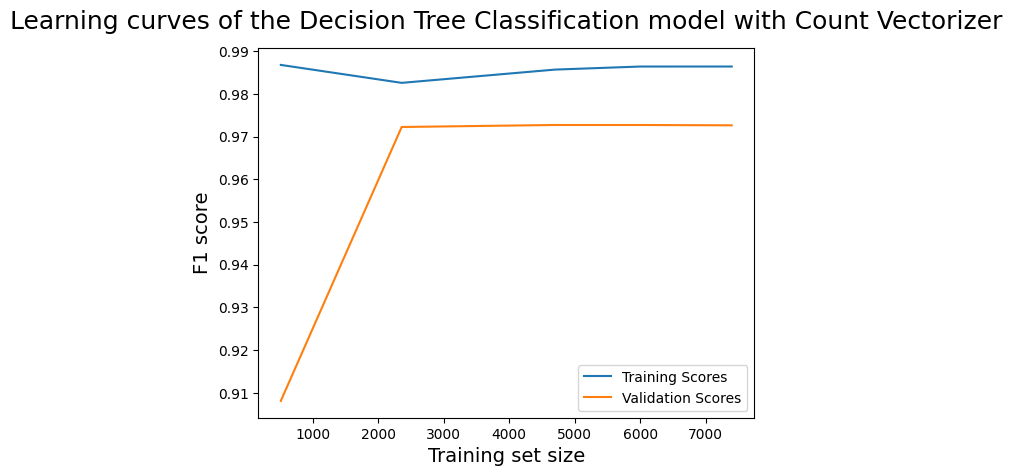

####################################################################################################
Decision Tree Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.99       463

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Decision Tree Model, Validation score is: 0.990857581927745
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(dt_obj, "Decision Tree", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels)

In [ ]:
# Save results in csv file.
results_in_csv = pd.DataFrame(columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

**Discussion Stage**
* There is no overfit using Decision Tree with Count Vectorizer, and it has a high performance.

#### TF-IDF Vectorizer

Decision Tree Model, F1-score is: 0.99734373125826
####################################################################################################

  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9902339911108415
  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.0031545654241399777
  Decision Tree Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.99218742 0.99414052 0.99062486 0.98945276 0.9847644 ]
####################################################################################################


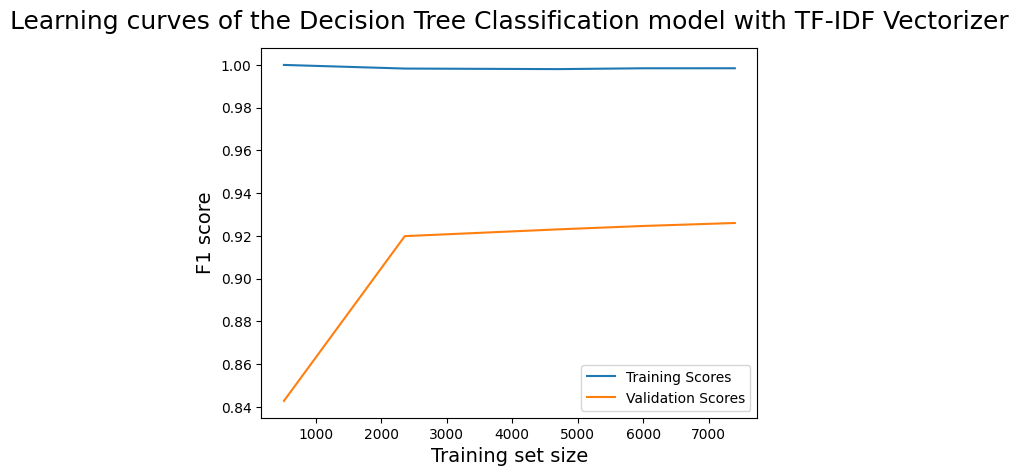

####################################################################################################
Decision Tree Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1600
           1       0.98      0.98      0.98       463

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Decision Tree Model, Validation score is: 0.9888777468676544
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(DecisionTreeClassifier(random_state= 42), "Decision Tree", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels)

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878

**Discussion Stage**
* There is no overfit using Decision Tree Classifier with TF-IDF Vectorizer.

#### Word2Vec

Decision Tree Model, F1-score is: 0.8616253941068576
####################################################################################################

  Decision Tree Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8519000934455871
  Decision Tree Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.007794892448646527
  Decision Tree Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.83761745 0.86112043 0.85242749 0.85562227 0.85271282]
####################################################################################################


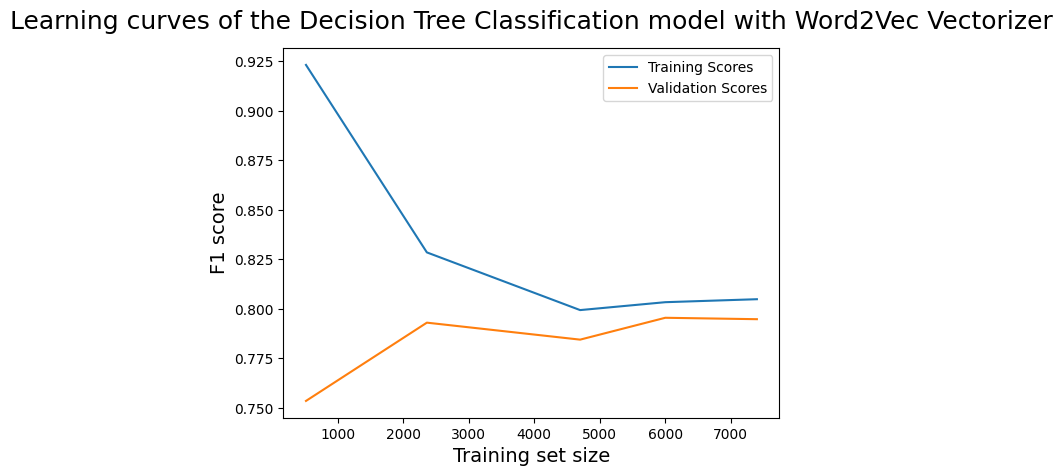

####################################################################################################
Decision Tree Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      1600
           1       0.55      0.84      0.67       463

    accuracy                           0.81      2063
   macro avg       0.75      0.82      0.77      2063
weighted avg       0.86      0.81      0.82      2063

####################################################################################################
Decision Tree Model, Validation score is: 0.7671294728524665
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(DecisionTreeClassifier(max_depth = 5, random_state= 42), "Decision Tree", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels)

**Discussion Stage**
* Performance is not bad, and there is not a small overfitting using Decision Tree Classifier with Word2Vec Vectorizer taking the validation score into consideration.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

### Random Forest Classifier model

#### Count Vectorizer

In [ ]:
forest_obj = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state= 42)

Random Forest Model, F1-score is: 0.7943788415034003
####################################################################################################

  Random Forest Classification with Count Vectorizer Cross Validation Mean Result is: 0.9050211077682974
  Random Forest Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.08316660243253927
  Random Forest Classification with Count Vectorizer Cross Validation Score Result is:
[0.76900073 0.84641066 0.96990001 0.97303054 0.9667636 ]
####################################################################################################


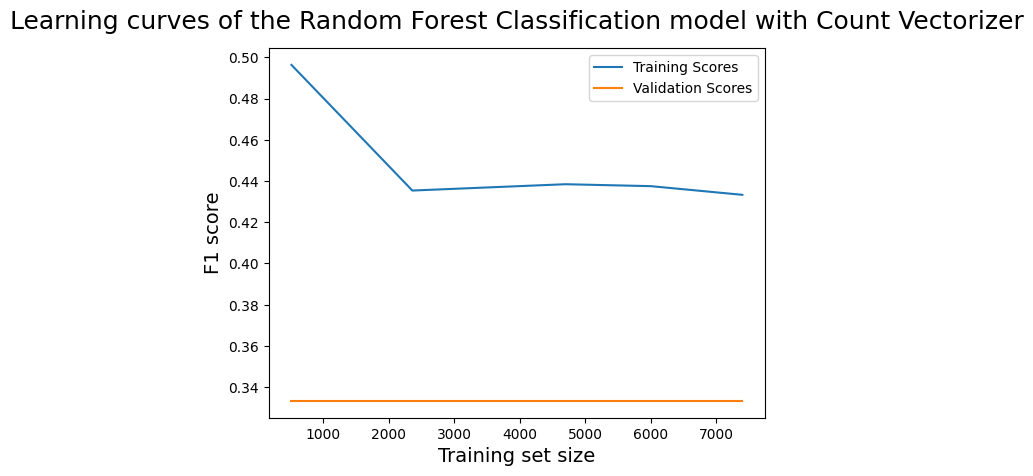

####################################################################################################
Random Forest Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      1600
           1       0.40      0.74      0.52       463

    accuracy                           0.69      2063
   macro avg       0.65      0.71      0.65      2063
weighted avg       0.79      0.69      0.71      2063

####################################################################################################
Random Forest Model, Validation score is: 0.6450834389394641
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(forest_obj, "Random Forest", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels)

**Discussion Stage**
* There is a small overfit using Random Forest Classifier with Count Vectorizer.
* After some exploration, the performance indicates bad results.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083

#### TF-IDF Vectorizer

Random Forest Model, F1-score is: 0.9667002131728651
####################################################################################################

  Random Forest Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.958152320009335
  Random Forest Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.011132605590102424
  Random Forest Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.94047149 0.94955111 0.96795115 0.9656139  0.96717396]
####################################################################################################


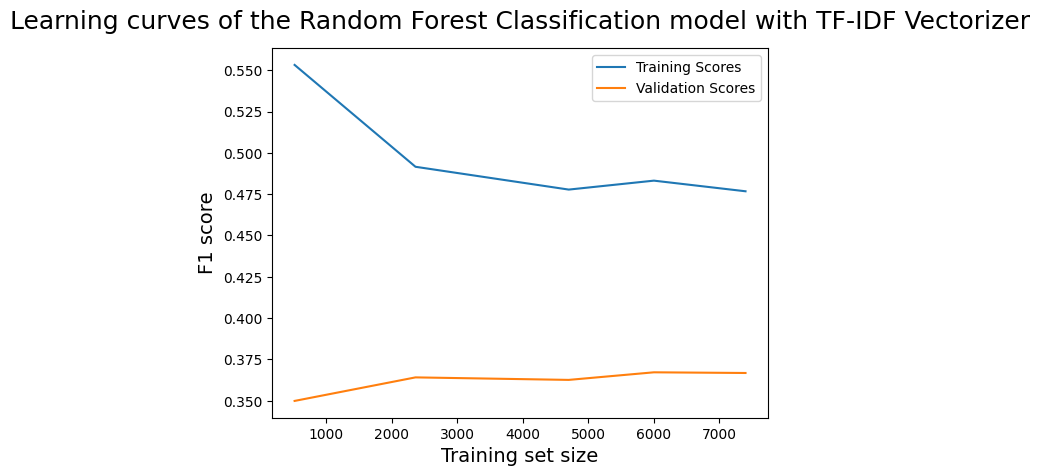

####################################################################################################
Random Forest Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1600
           1       0.96      0.92      0.94       463

    accuracy                           0.97      2063
   macro avg       0.97      0.95      0.96      2063
weighted avg       0.97      0.97      0.97      2063

####################################################################################################
Random Forest Model, Validation score is: 0.9611372388241947
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(forest_obj, "Random Forest", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels)

**Discussion Stage**
* Learning Rate indicates that there is no overfit using Random Forest Classifier with TF-IDF Vectorizer.
* After some exploration, the overfit is small and can be ignored in some cases.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137

#### Compute ROC of the best performance

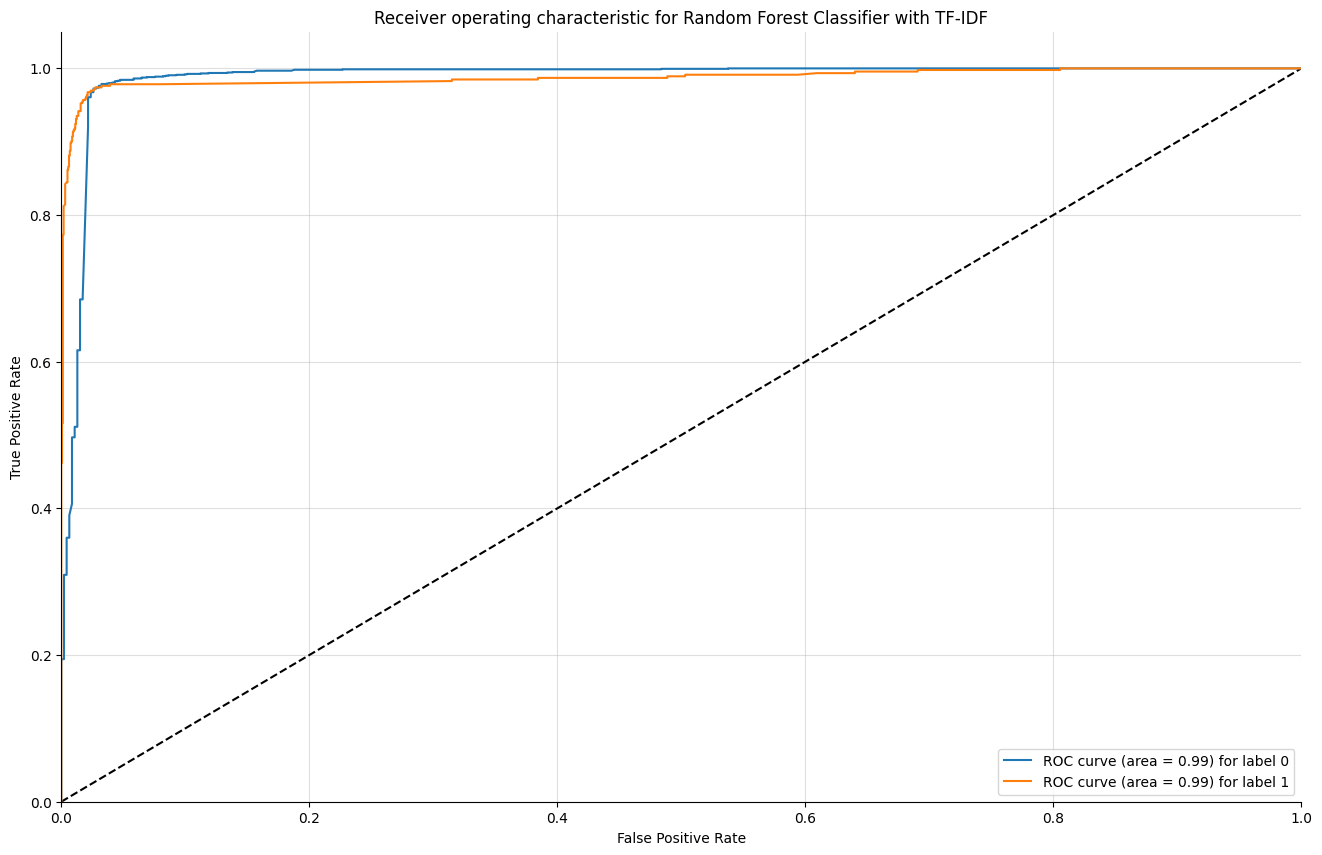

In [ ]:
plot_multiclass_roc("Random Forest", "TF-IDF", forest_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

Random Forest Model, F1-score is: 0.8829449564257759
####################################################################################################

  Random Forest Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.876205414715896
  Random Forest Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.0081969654686507
  Random Forest Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.86010707 0.88037412 0.87837516 0.87920377 0.88296696]
####################################################################################################


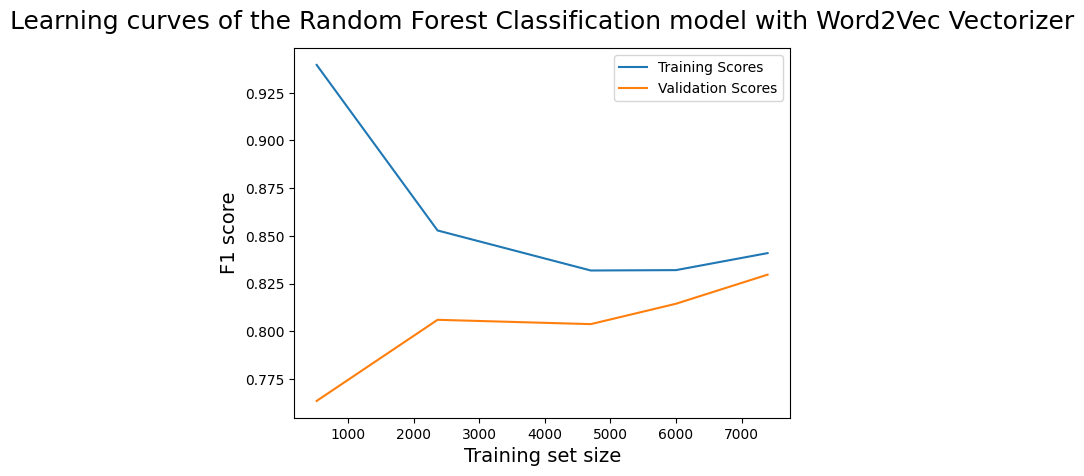

####################################################################################################
Random Forest Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      1600
           1       0.61      0.88      0.72       463

    accuracy                           0.85      2063
   macro avg       0.78      0.86      0.81      2063
weighted avg       0.88      0.85      0.85      2063

####################################################################################################
Random Forest Model, Validation score is: 0.8064344236175531
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(forest_obj, "Random Forest", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels)

**Discussion Stage**
* There is no overfit using Random forest classifier with word2vec vectorizer, but after some exploration I found bad results the indicate over fit using validation set.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434

### Extra Trees Classifier model

In [ ]:
# Create an object the of Extra Tree Classifier.
extra_obj = ExtraTreesClassifier(n_estimators= 100, max_depth= 5, random_state= 42)

#### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(extra_obj, "Extra Trees", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Extra Trees Model, F1-score is: 0.786464134516432
####################################################################################################

  Extra Trees Classification with Count Vectorizer Cross Validation Mean Result is: 0.7905394562690703
  Extra Trees Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.11141019602904542
  Extra Trees Classification with Count Vectorizer Cross Validation Score Result is:
[0.61472106 0.76436965 0.79856292 0.81140134 0.96364231]
####################################################################################################
Extra Trees Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74      1600
           1       0.37      0.75      0.50       463

    accuracy                           0.66      2063
   macro avg       0.63      0.69      0.62      2063
weighted avg       0.78      0.66      0.69      2063

######

**Discussion Stage**
* There is an overfit using Extra Tree Classifier with Count Vectorizer, and the performance is bad.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(extra_obj, "Extra Trees", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Extra Trees Model, F1-score is: 0.7830882182686967
####################################################################################################

  Extra Trees Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.7482438141507274
  Extra Trees Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.029242769853192886
  Extra Trees Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.79563461 0.76879077 0.73086796 0.71925744 0.72666828]
####################################################################################################
Extra Trees Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1600
           1       0.90      0.63      0.74       463

    accuracy                           0.90      2063
   macro avg       0.90      0.81      0.84      2063
weighted avg       0.90      0.90      0.89      2063

#

**Discussion Stage**
* There is no overfit using Extra Trees Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631

#### Word2Vec

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(extra_obj, "Extra Trees", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Extra Trees Model, F1-score is: 0.8665436647702047
####################################################################################################

  Extra Trees Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8641133360615492
  Extra Trees Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.006980871964276952
  Extra Trees Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.85377738 0.86011038 0.86299015 0.87190538 0.87178338]
####################################################################################################
Extra Trees Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      1600
           1       0.57      0.91      0.70       463

    accuracy                           0.83      2063
   macro avg       0.77      0.86      0.79      2063
weighted avg       0.88      0.83      0.84      2

**Discussion Stage**
* There is an overfit using Extra Trees Classifier with Word2Vec Vectorizer, and the result is bad by taking validation set into consideration.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631
0    Extra Trees   Word2Vec        0.866544       0.791112

### KNN Classifier model

In [ ]:
# Create an object the of KNN Classifier.
knn_obj = OneVsOneClassifier(KNeighborsClassifier(n_neighbors= 5))

#### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(knn_obj, "KNN", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

KNN Model, F1-score is: 0.7494343265055841
####################################################################################################

  KNN Classification with Count Vectorizer Cross Validation Mean Result is: 0.6476789232779293
  KNN Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.01187912974215895
  KNN Classification with Count Vectorizer Cross Validation Score Result is:
[0.66106682 0.62854495 0.65262564 0.65630765 0.63984955]
####################################################################################################
KNN Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.98      0.39      0.56      1600
           1       0.32      0.97      0.48       463

    accuracy                           0.52      2063
   macro avg       0.65      0.68      0.52      2063
weighted avg       0.83      0.52      0.54      2063

#############################################

**Discussion Stage**
* There is an overfit using KNN Classifier with Count Vectorizer, but I think that decreasing the data will perform better.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(knn_obj, "KNN", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

KNN Model, F1-score is: 0.6584727850871892
####################################################################################################

  KNN Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.5739092278319915
  KNN Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.01041303231382829
  KNN Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.56556935 0.5741828  0.5802853  0.56008388 0.58942481]
####################################################################################################
KNN Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.98      0.30      0.46      1600
           1       0.29      0.98      0.45       463

    accuracy                           0.46      2063
   macro avg       0.64      0.64      0.46      2063
weighted avg       0.83      0.46      0.46      2063

##########################################

**Discussion Stage**
* There is an overfit and bad results using KNN Classifier with TF-IDF Vectorizer, but I think that decreasing the data will perform better.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)

#### Word2Vec

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(knn_obj, "KNN", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

KNN Model, F1-score is: 0.889908720587701
####################################################################################################

  KNN Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8470308798055693
  KNN Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.0028339123193720293
  KNN Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.84870351 0.85070911 0.84447736 0.84304424 0.84822019]
####################################################################################################
KNN Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      1600
           1       0.50      0.92      0.65       463

    accuracy                           0.78      2063
   macro avg       0.74      0.83      0.74      2063
weighted avg       0.87      0.78      0.79      2063

###################################

**Discussion Stage**
* There is an overfit using KNN Classifier with Word2Vec Vectorizer, but I think that decreasing the data will perform better, and the result is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631
0    Extra Trees   Word2Vec        0.866544       0.791112
0            KNN      Count        0.749434       0.519039
0            KNN     TF-IDF        0.658473       0.455993
0            KNN   Word2Vec        0.889909       0.743624

#### Compute ROC of the best performance

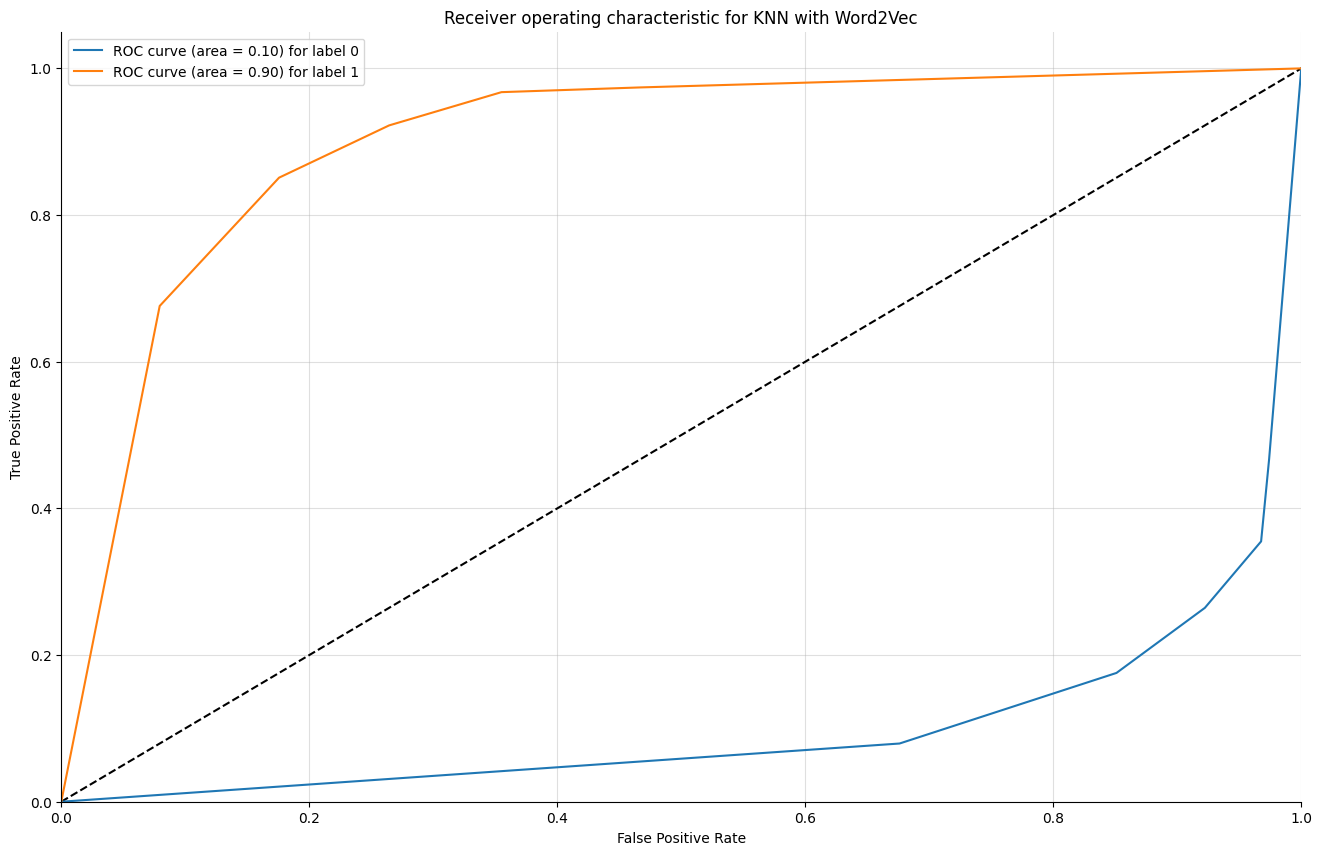

In [ ]:
plot_multiclass_roc("KNN", "Word2Vec", knn_obj, word2vec_val_data, word2vec_val_labels, n_classes=2, figsize=(16, 10))

### SVC Classifier model

In [ ]:
# Create an object the of SVC Classifier.
svc_obj = SVC(kernel='linear', class_weight='balanced', probability=True, decision_function_shape= 'ovo')

#### Cout Vectorizer

SVC Model, F1-score is: 0.982181846564403
####################################################################################################

  SVC Classification with Count Vectorizer Cross Validation Mean Result is: 0.966995775980412
  SVC Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.008955099508499558
  SVC Classification with Count Vectorizer Cross Validation Score Result is:
[0.94949655 0.97068859 0.97029829 0.97498968 0.96950577]
####################################################################################################


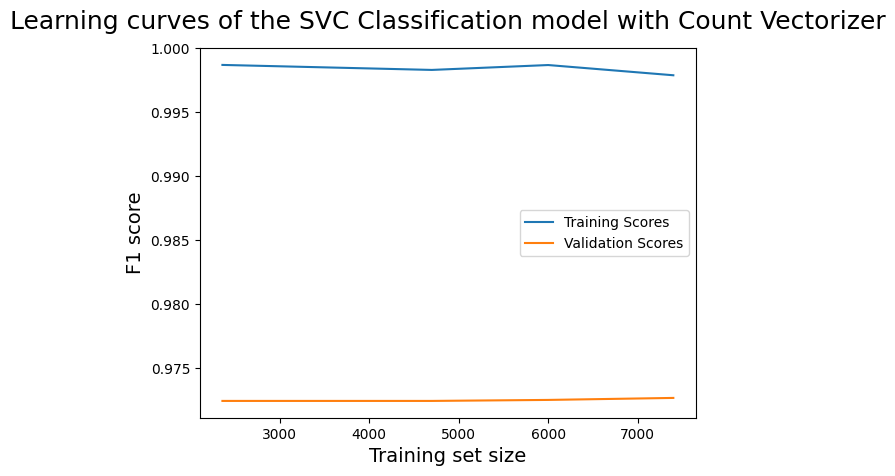

####################################################################################################
SVC Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1600
           1       0.98      0.95      0.96       463

    accuracy                           0.98      2063
   macro avg       0.98      0.97      0.98      2063
weighted avg       0.98      0.98      0.98      2063

####################################################################################################
SVC Model, Validation score is: 0.9767558422802007
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(svc_obj, "SVC", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using SVC Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(svc_obj, "SVC", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

SVC Model, F1-score is: 0.9792943624952439
####################################################################################################

  SVC Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9669430248890727
  SVC Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.007749314675658854
  SVC Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.95427091 0.96326609 0.97265458 0.97656044 0.9679631 ]
####################################################################################################
SVC Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1600
           1       0.86      0.99      0.92       463

    accuracy                           0.96      2063
   macro avg       0.93      0.97      0.95      2063
weighted avg       0.97      0.96      0.96      2063

#########################################

**Discussion Stage**
* There is no overfit using SVC Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)

#### Compute ROC of the best performance

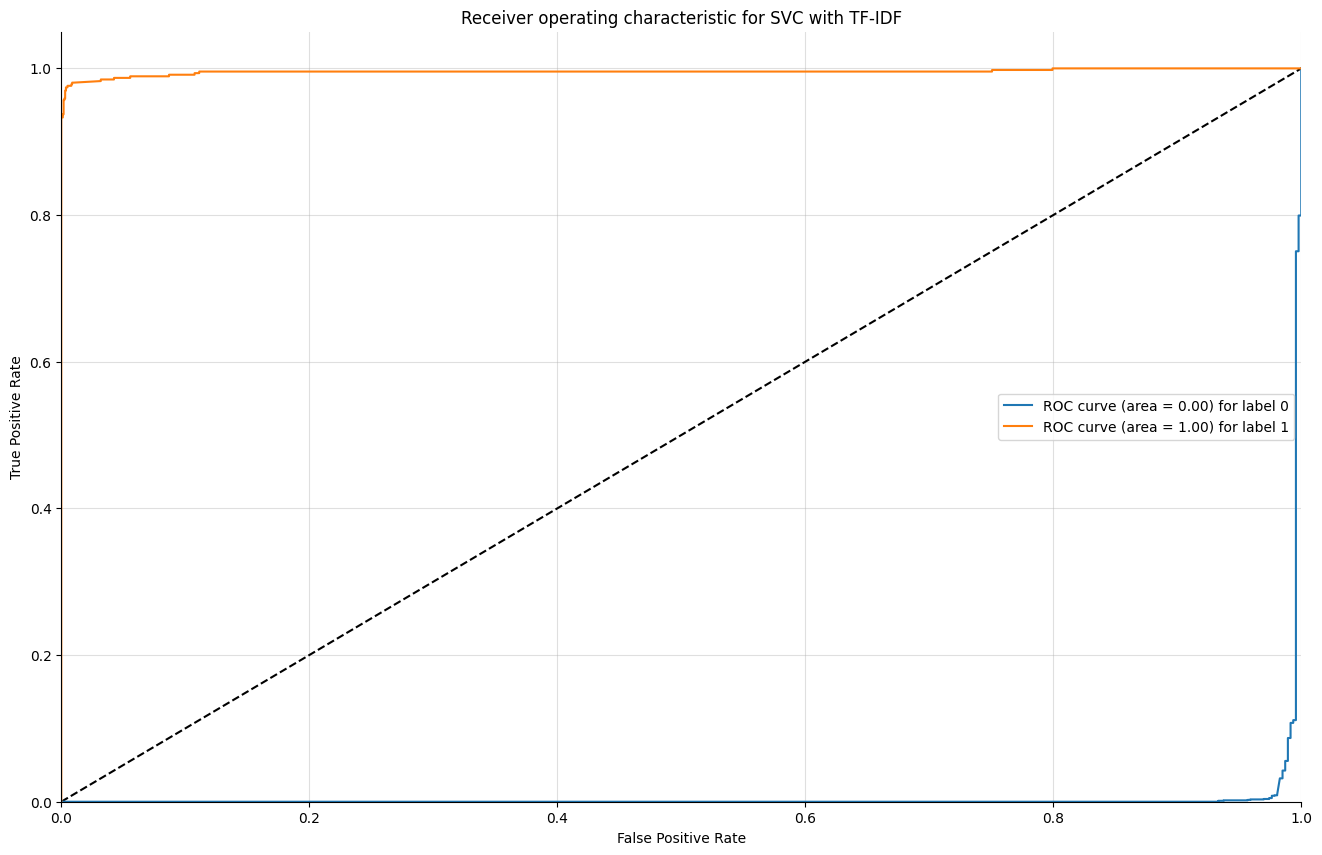

In [ ]:
plot_multiclass_roc("SVC", "TF-IDF", svc_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

SVC Model, F1-score is: 0.8027392965703863
####################################################################################################

  SVC Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8009129413435273
  SVC Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.007633474506544239
  SVC Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.78994511 0.80803592 0.8075188  0.79349628 0.8055686 ]
####################################################################################################


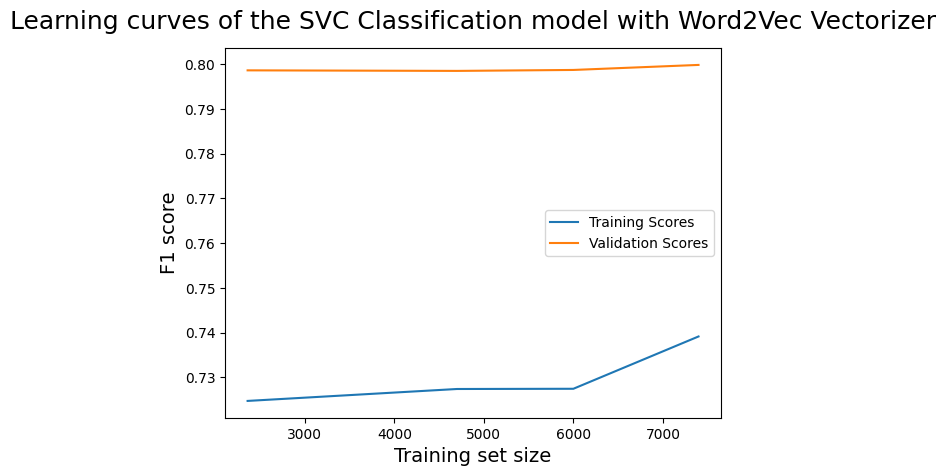

####################################################################################################
SVC Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      1600
           1       0.51      0.84      0.63       463

    accuracy                           0.78      2063
   macro avg       0.73      0.80      0.74      2063
weighted avg       0.85      0.78      0.80      2063

####################################################################################################
SVC Model, Validation score is: 0.7396230669813946
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(svc_obj, "SVC", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using SVC Classifier with Word2Vec Vectorizer.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631
0    Extra Trees   Word2Vec        0.866544       0.791112
0            KNN      Count        0.749434       0.519039
0            KNN     TF-IDF        0.658473       0.455993
0            KNN   Word2Vec        0.889909       0.743624
0            SVC      Count        0.982182       0.976756
0            SVC     TF-IDF        0.979294       0.946361
0            SVC   Word2Vec        0.802739       0.739623

### XGBoost Classsifier model

In [ ]:
# Create an object the of XGBoost Classifier.
xgb_obj = OneVsOneClassifier(XGBClassifier(learning_rate= 0.03, max_depth=2, subsample= 0.25, n_estimators= 90, random_state= 42))

#### Count Vectorizer

XGBoost Model, F1-score is: 0.9730272801026258
####################################################################################################

  XGBoost Classification with Count Vectorizer Cross Validation Mean Result is: 0.9739664982235435
  XGBoost Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0018124670882037526
  XGBoost Classification with Count Vectorizer Cross Validation Score Result is:
[0.97341875 0.97654962 0.97381019 0.97498437 0.97106958]
####################################################################################################


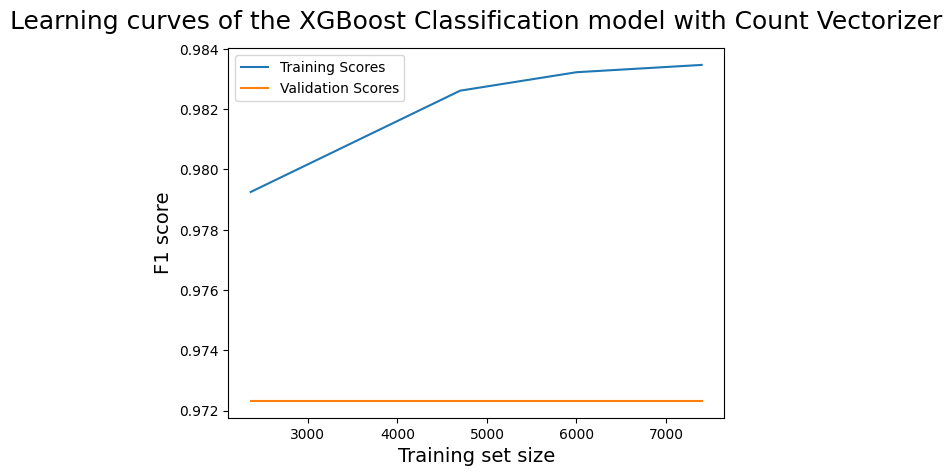

####################################################################################################
XGBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
XGBoost Model, Validation score is: 0.9887212290197365
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(xgb_obj, "XGBoost", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using XGBoost Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(xgb_obj, "XGBoost", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

XGBoost Model, F1-score is: 0.9738101858404904
####################################################################################################

  XGBoost Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9742009624439343
  XGBoost Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.0028551779870570003
  XGBoost Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.9742016  0.97733211 0.97302728 0.97694088 0.96950294]
####################################################################################################
XGBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################

**Discussion Stage**
* There is no overfit using XGBoost Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631
0    Extra Trees   Word2Vec        0.866544       0.791112
0            KNN      Count        0.749434       0.519039
0            KNN     TF-IDF        0.658473       0.455993
0            KNN   Word2Vec        0.889909       0.743624
0            SVC      Count        0.982182       0.976756
0            SVC     TF-IDF        0.979294       0.946361
0            SVC   Word2Vec        0.802739       0.739623
0        XGBoost      Count        0.973027       0.988721
0        XGBoost     TF-IDF        0.973810       0.988721

#### Compute ROC of the best performance

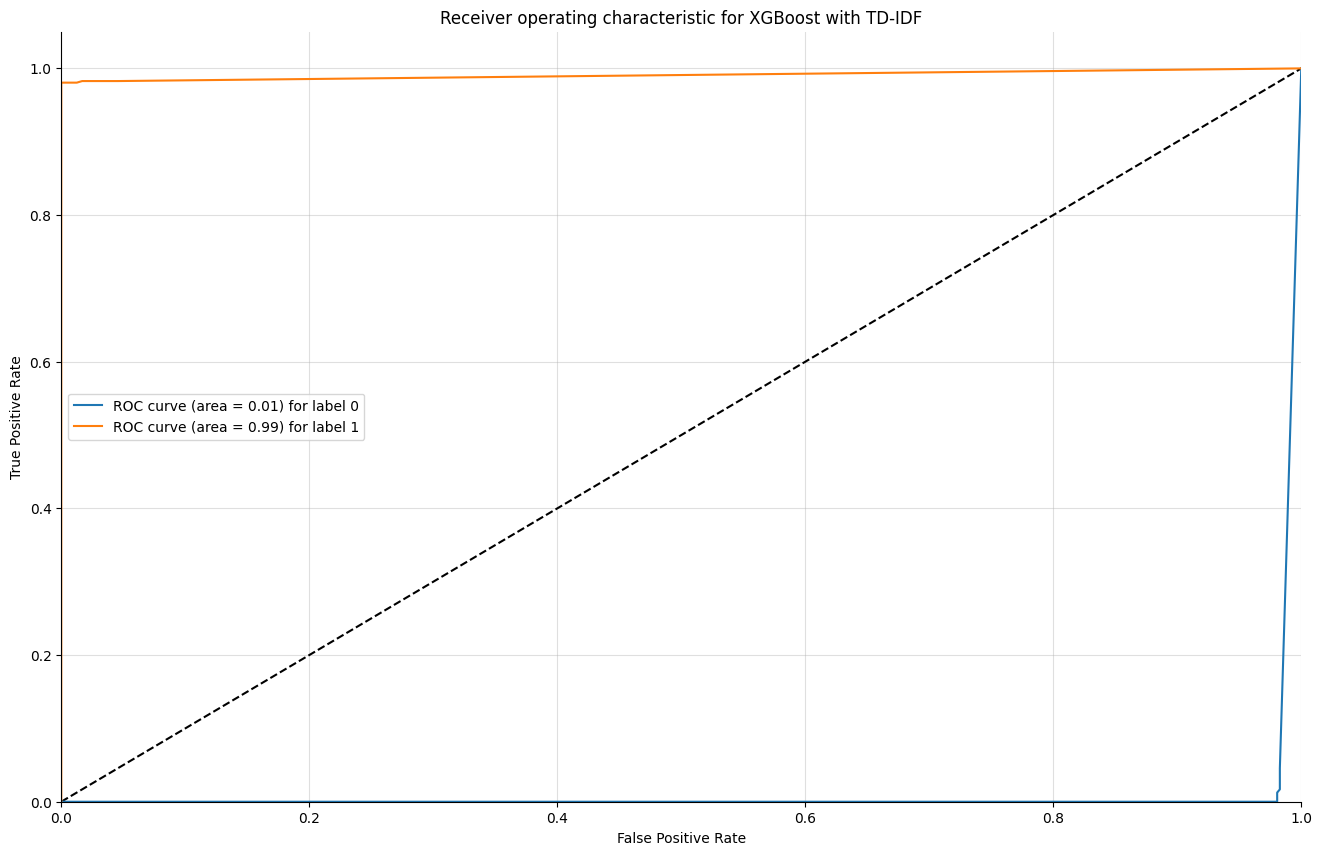

In [ ]:
plot_multiclass_roc("XGBoost", "TD-IDF", xgb_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

XGBoost Model, F1-score is: 0.8672514187825844
####################################################################################################

  XGBoost Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.865460155186673
  XGBoost Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.00392591171670223
  XGBoost Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.85766647 0.86730095 0.86660536 0.86768323 0.86804477]
####################################################################################################


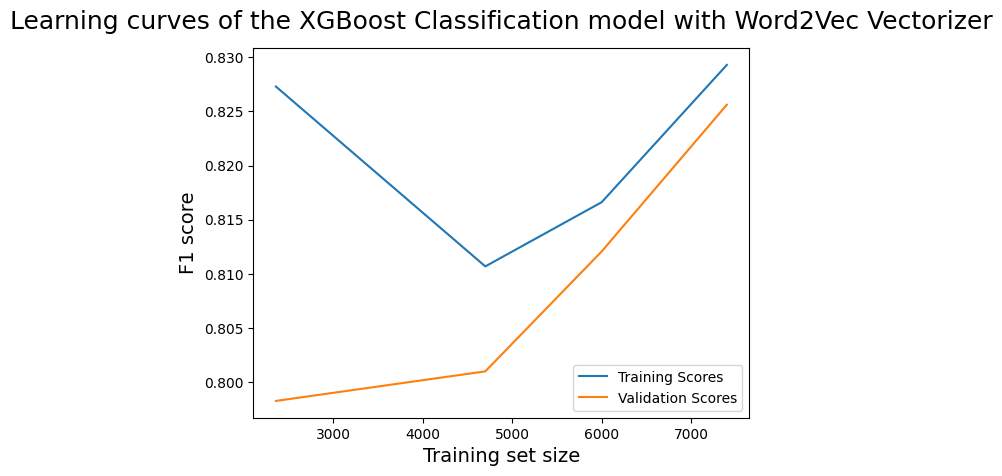

####################################################################################################
XGBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1600
           1       0.59      0.89      0.71       463

    accuracy                           0.84      2063
   macro avg       0.78      0.86      0.80      2063
weighted avg       0.88      0.84      0.85      2063

####################################################################################################
XGBoost Model, Validation score is: 0.7972622635027895
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(xgb_obj, "XGBoost", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using XGBoost Classifier with Word2Vec Vectorizer, and the result is bad because in some cases there is an underfit.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0  Decision Tree      Count        0.973262       0.990858
0  Decision Tree     TF-IDF        0.997344       0.988878
0  Decision Tree   Word2Vec        0.861625       0.767129
0  Random Forest      Count        0.794379       0.645083
0  Random Forest     TF-IDF        0.966700       0.961137
0  Random Forest   Word2Vec        0.882945       0.806434
0    Extra Trees      Count        0.786464       0.617812
0    Extra Trees     TF-IDF        0.783088       0.840631
0    Extra Trees   Word2Vec        0.866544       0.791112
0            KNN      Count        0.749434       0.519039
0            KNN     TF-IDF        0.658473       0.455993
0            KNN   Word2Vec        0.889909       0.743624
0            SVC      Count        0.982182       0.976756
0            SVC     TF-IDF        0.979294       0.946361
0            SVC   Word2Vec        0.802739       0.739623
0        XGBoost      Count        0.973027       0.988721
0        XGBoost     TF-IDF        0.973810       0.988721
0        XGBoost   Word2Vec        0.867251       0.797262

### SGD Classifier model

In [ ]:
# Create an object the of SGD Classifier.
sgd_obj = OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42))

#### Count Vectorizer

SGD Classifier Model, F1-score is: 0.9782717247824755
####################################################################################################

  SGD Classifier Classification with Count Vectorizer Cross Validation Mean Result is: 0.9728769422440949
  SGD Classifier Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.005134484768819475
  SGD Classifier Classification with Count Vectorizer Cross Validation Score Result is:
[0.97850838 0.97811911 0.96794995 0.9738193  0.96598797]
####################################################################################################


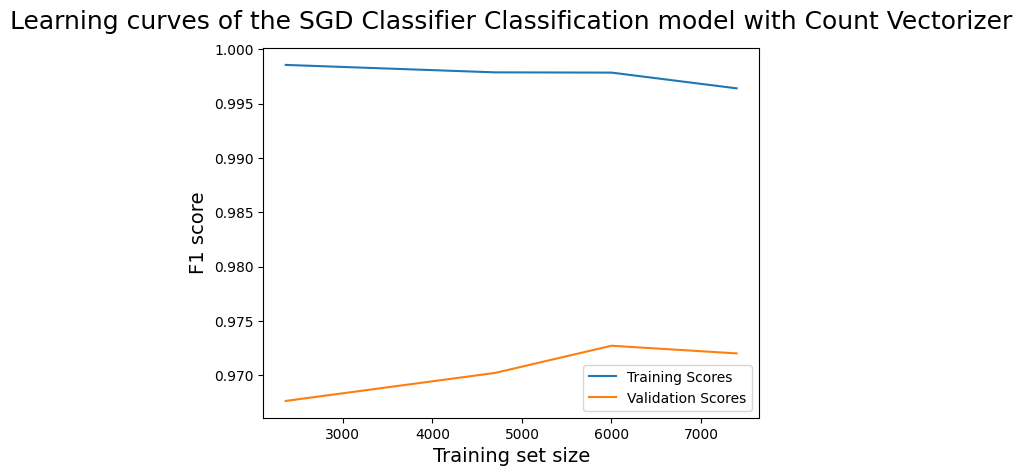

####################################################################################################
SGD Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.99      0.98      0.99       463

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
SGD Classifier Model, Validation score is: 0.9923240299164279
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(sgd_obj, "SGD Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using SGD Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(sgd_obj, "SGD Classifier", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

SGD Classifier Model, F1-score is: 0.9597038918246574
####################################################################################################

  SGD Classifier Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9570878367147442
  SGD Classifier Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.01633402719967303
  SGD Classifier Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.98163636 0.97029154 0.94948895 0.94673765 0.93728468]
####################################################################################################
SGD Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.99      0.98      0.99       463

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.9

**Discussion Stage**
* There is no overfit using SGD Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0   Decision Tree      Count        0.973262       0.990858
0   Decision Tree     TF-IDF        0.997344       0.988878
0   Decision Tree   Word2Vec        0.861625       0.767129
0   Random Forest      Count        0.794379       0.645083
0   Random Forest     TF-IDF        0.966700       0.961137
0   Random Forest   Word2Vec        0.882945       0.806434
0     Extra Trees      Count        0.786464       0.617812
0     Extra Trees     TF-IDF        0.783088       0.840631
0     Extra Trees   Word2Vec        0.866544       0.791112
0             KNN      Count        0.749434       0.519039
0             KNN     TF-IDF        0.658473       0.455993
0             KNN   Word2Vec        0.889909       0.743624
0             SVC      Count        0.982182       0.976756
0             SVC     TF-IDF        0.979294       0.946361
0             SVC   Word2Vec        0.802739       0.739623
0         XGBoost      Count        0.973027       0.988721
0         XGBoost     TF-IDF        0.973810       0.988721
0         XGBoost   Word2Vec        0.867251       0.797262
0  SGD Classifier      Count        0.978272       0.992324
0  SGD Classifier     TF-IDF        0.959704       0.991620

#### Compute ROC of the best performance

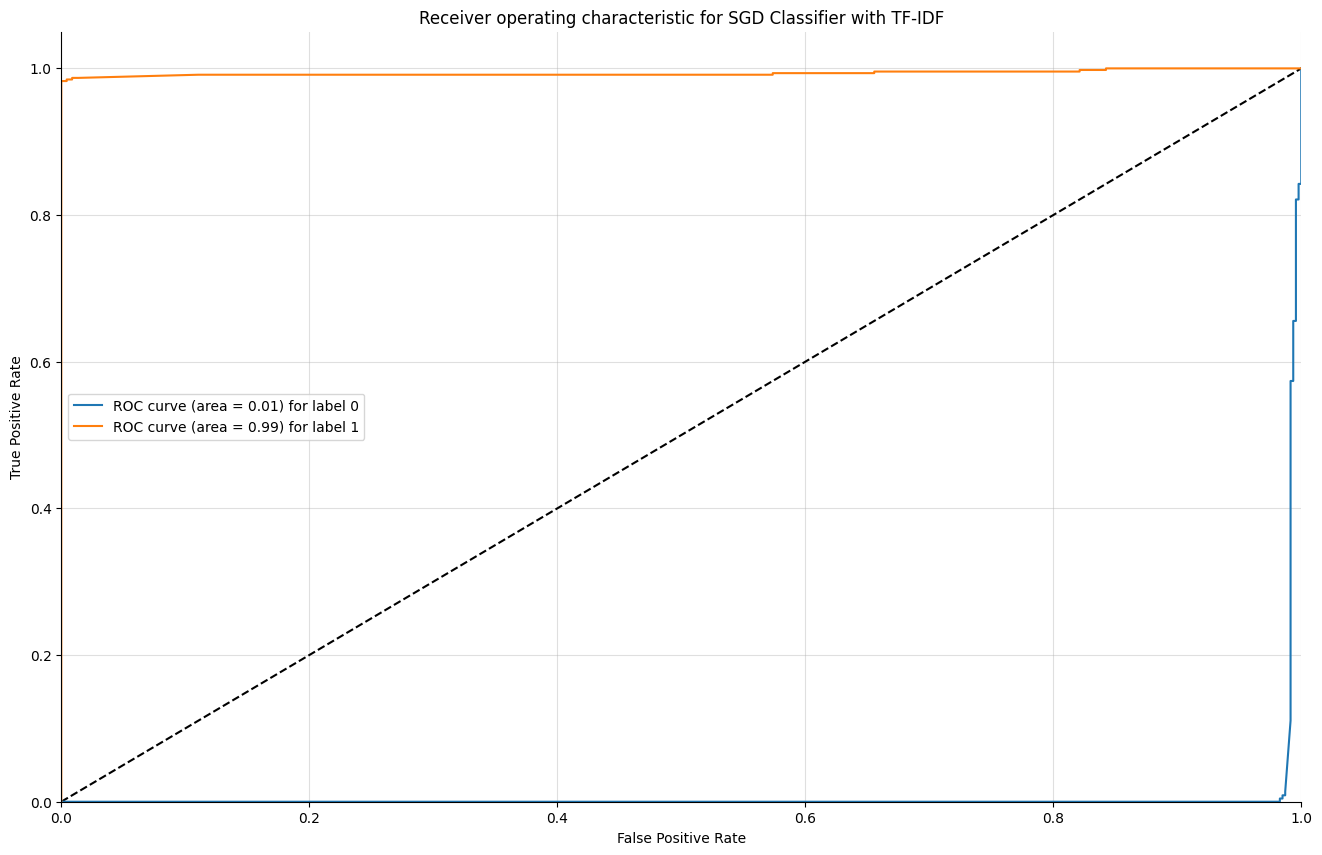

In [ ]:
plot_multiclass_roc("SGD Classifier", "TF-IDF", sgd_obj, tfidf_val_data, tfidf_val_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

SGD Classifier Model, F1-score is: 0.800410109517327
####################################################################################################

  SGD Classifier Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.7999128363403333
  SGD Classifier Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.005232145490787688
  SGD Classifier Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.79216264 0.80247369 0.79999219 0.79712036 0.8078153 ]
####################################################################################################


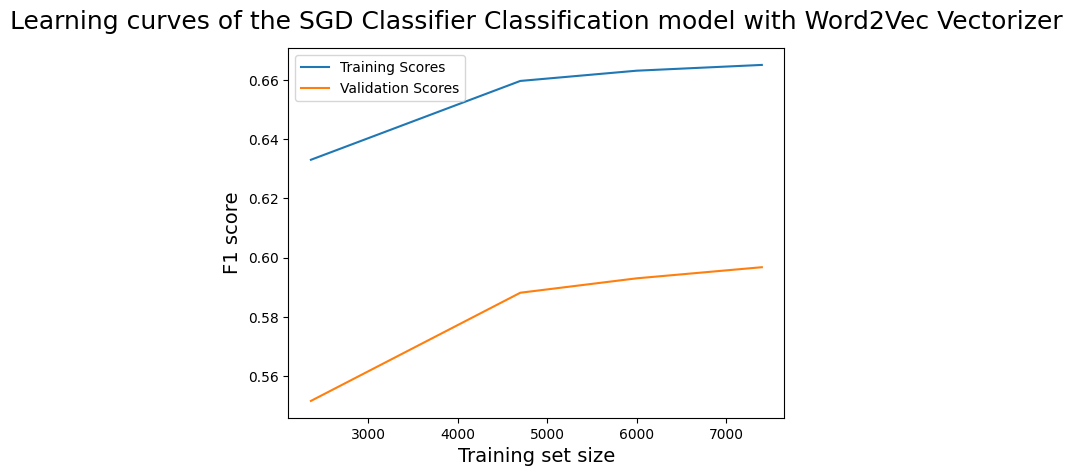

####################################################################################################
SGD Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1600
           1       0.52      0.83      0.64       463

    accuracy                           0.79      2063
   macro avg       0.73      0.80      0.74      2063
weighted avg       0.84      0.79      0.80      2063

####################################################################################################
SGD Classifier Model, Validation score is: 0.7431576469946175
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(sgd_obj, "SGD Classifier", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using SGD Classifier with Word2Vec Vectorizer, and the result is bad because of in some cases there is an underfit.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0   Decision Tree      Count        0.973262       0.990858
0   Decision Tree     TF-IDF        0.997344       0.988878
0   Decision Tree   Word2Vec        0.861625       0.767129
0   Random Forest      Count        0.794379       0.645083
0   Random Forest     TF-IDF        0.966700       0.961137
0   Random Forest   Word2Vec        0.882945       0.806434
0     Extra Trees      Count        0.786464       0.617812
0     Extra Trees     TF-IDF        0.783088       0.840631
0     Extra Trees   Word2Vec        0.866544       0.791112
0             KNN      Count        0.749434       0.519039
0             KNN     TF-IDF        0.658473       0.455993
0             KNN   Word2Vec        0.889909       0.743624
0             SVC      Count        0.982182       0.976756
0             SVC     TF-IDF        0.979294       0.946361
0             SVC   Word2Vec        0.802739       0.739623
0         XGBoost      Count        0.973027       0.988721
0         XGBoost     TF-IDF        0.973810       0.988721
0         XGBoost   Word2Vec        0.867251       0.797262
0  SGD Classifier      Count        0.978272       0.992324
0  SGD Classifier     TF-IDF        0.959704       0.991620
0  SGD Classifier   Word2Vec        0.800410       0.743158

### Voting Classifier model

In [ ]:
vote1 = OneVsOneClassifier(RandomForestClassifier(n_estimators= 100, max_depth= 2, random_state= 42, max_features= 5))
vote2 = OneVsOneClassifier(XGBClassifier(learning_rate= 0.04, max_depth=2, n_estimators= 100, random_state= 42))
vote3 = SVC(kernel='rbf', decision_function_shape= 'ovo')
vote4 = OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42))
vote5 = OneVsOneClassifier(DecisionTreeClassifier(max_depth=3, max_features= 6, random_state= 42))
# Create an object the of Voting Classifier.
voting_model = VotingClassifier(estimators=[('rf', vote1), ('xgb', vote2), ('svc', vote3), ('sgd', vote4), ('dt', vote5)], voting='hard')

#### Count Vectorizer

Voting Classifier Model, F1-score is: 0.982807783893062
####################################################################################################

  Voting Classifier Classification with Count Vectorizer Cross Validation Mean Result is: 0.9745982677271214
  Voting Classifier Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0036789189723909835
  Voting Classifier Classification with Count Vectorizer Cross Validation Score Result is:
[0.97811665 0.97772809 0.97264582 0.97616576 0.96833502]
####################################################################################################


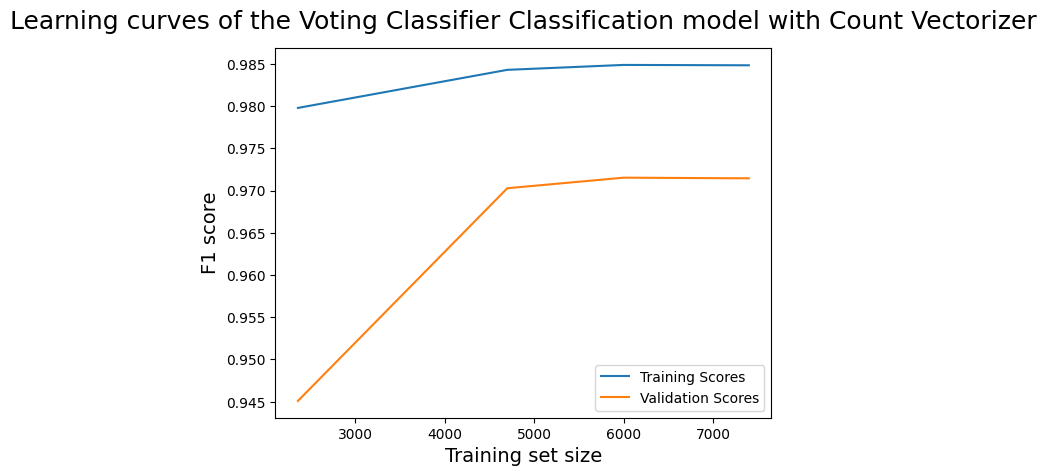

####################################################################################################
Voting Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.99      0.98      0.99       463

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Voting Classifier Model, Validation score is: 0.9923240299164279
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(voting_model, "Voting Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using Voting Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(voting_model, "Voting Classifier", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Voting Classifier Model, F1-score is: 0.9687194525904204
####################################################################################################

  Voting Classifier Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9672221857303176
  Voting Classifier Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.009216979767725564
  Voting Classifier Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.98124341 0.97146117 0.96480024 0.96558433 0.95302178]
####################################################################################################
Voting Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99   

**Discussion Stage**
* There is no overfit using Voting Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)

#### Word2Vec

Voting Classifier Model, F1-score is: 0.8593358395989974
####################################################################################################

  Voting Classifier Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8598700826872484
  Voting Classifier Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.007735944173882856
  Voting Classifier Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.84519676 0.86331395 0.86153993 0.86808325 0.86121652]
####################################################################################################


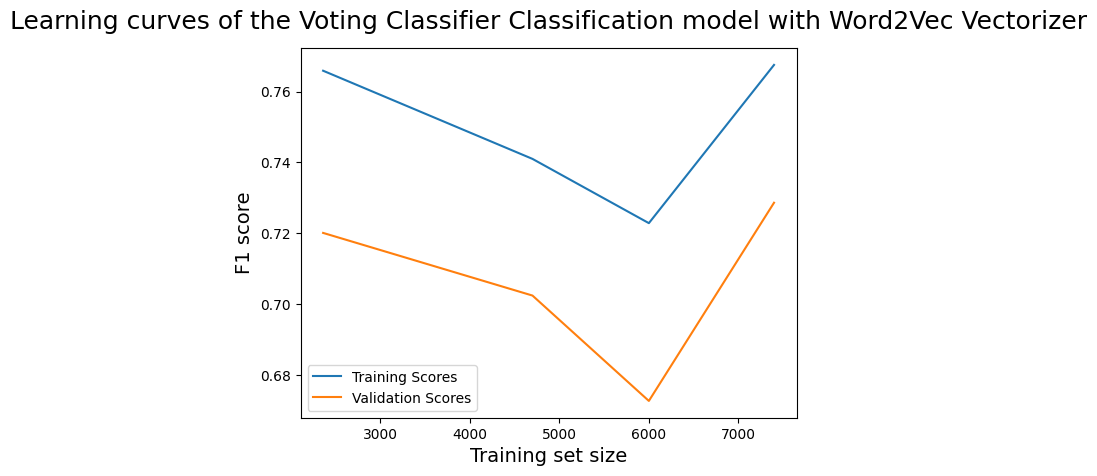

####################################################################################################
Voting Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1600
           1       0.57      0.89      0.70       463

    accuracy                           0.83      2063
   macro avg       0.77      0.85      0.79      2063
weighted avg       0.87      0.83      0.84      2063

####################################################################################################
Voting Classifier Model, Validation score is: 0.7878142526605654
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(voting_model, "Voting Classifier", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using Voting Classifier with Word2Vec Vectorizer, and the result is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814

### Multinomial NB model

In [ ]:
# Create Multinomial NB object
MultinomialNB_obj = MultinomialNB(alpha=0.001)

#### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(MultinomialNB_obj, "Multinomial NB", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Multinomial NB Model, F1-score is: 0.9796828329046581
####################################################################################################

  Multinomial NB Classification with Count Vectorizer Cross Validation Mean Result is: 0.8758320238858207
  Multinomial NB Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.020552673099746326
  Multinomial NB Classification with Count Vectorizer Cross Validation Score Result is:
[0.83905045 0.8682341  0.89298706 0.89372026 0.88516824]
####################################################################################################
Multinomial NB Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      1600
           1       0.61      0.99      0.76       463

    accuracy                           0.86      2063
   macro avg       0.80      0.90      0.83      2063
weighted avg       0.91      0.86      0.87 

**Discussion Stage**
* There is an overfit using Multinomial NB Classifier with Count Vectorizer by evaluating Validation set.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(MultinomialNB_obj, "Multinomial NB", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Multinomial NB Model, F1-score is: 0.9584206073566168
####################################################################################################

  Multinomial NB Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9429055820499533
  Multinomial NB Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.0041651540704830715
  Multinomial NB Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.93467942 0.94524482 0.94525633 0.94562825 0.94371908]
####################################################################################################
Multinomial NB Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1600
           1       0.76      0.92      0.84       463

    accuracy                           0.92      2063
   macro avg       0.87      0.92      0.89      2063
weighted avg       0.93      0.92      0

**Discussion Stage**
* There is an overfit using Multinomial NB Classifier with TF-IDF Vectorizer by evaluating it on Validation set.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603

#### Word2Vec

Multinomial NB Model, F1-score is: 0.778504916610379
####################################################################################################

  Multinomial NB Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.777862936985869
  Multinomial NB Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.0033093894213329774
  Multinomial NB Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.77343695 0.78272962 0.78046862 0.77650794 0.77617157]
####################################################################################################


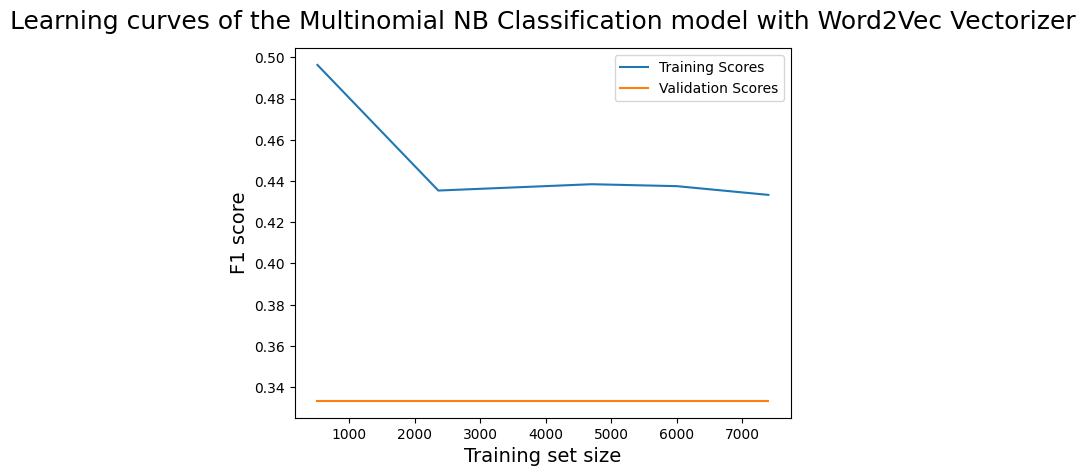

####################################################################################################
Multinomial NB Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      0.17      0.28      1600
           1       0.26      1.00      0.41       463

    accuracy                           0.35      2063
   macro avg       0.63      0.58      0.35      2063
weighted avg       0.83      0.35      0.31      2063

####################################################################################################
Multinomial NB Model, Validation score is: 0.34698983035897835
####################################################################################################


In [ ]:
scaler = MinMaxScaler()
NB_X_train = scaler.fit_transform(word2vec_training_data)
NB_X_test = scaler.transform(word2vec_val_data)
model_name, vectorizer_name, model_score, model_test_score = classifier_process(MultinomialNB_obj, "Multinomial NB", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = NB_X_train, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using Multinomial NB with Word2Vec Vectorizer, and the performance is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603
0     Multinomial NB   Word2Vec        0.778505       0.346990

### Ada Boost Classifier model

In [ ]:
# Create an object the of Ada Boost Classifier.
ada_obj = OneVsOneClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=70, learning_rate=0.009, random_state=42))

#### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ada_obj, "AdaBoost", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

AdaBoost Model, F1-score is: 0.9750626364071254
####################################################################################################
AdaBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063

####################################################################################################
AdaBoost Model, Validation score is: 0.9943958187320371
####################################################################################################


**Discussion Stage**
* There is some underfit using AdaBoost Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ada_obj, "AdaBoost", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

AdaBoost Model, F1-score is: 0.9799137776190061
####################################################################################################
AdaBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063

####################################################################################################
AdaBoost Model, Validation score is: 0.9936903875516413
####################################################################################################


**Discussion Stage**
* There is no overfit using AdaBoost Classifier with TF-IDF Vectorizer.
* There is some underoverfitting, but the score indicates fitting 100%, we have to take this into consideration.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603
0     Multinomial NB   Word2Vec        0.778505       0.346990
0           AdaBoost      Count        0.975063       0.994396
0           AdaBoost     TF-IDF        0.979914       0.993690

#### Compute ROC of the best performance

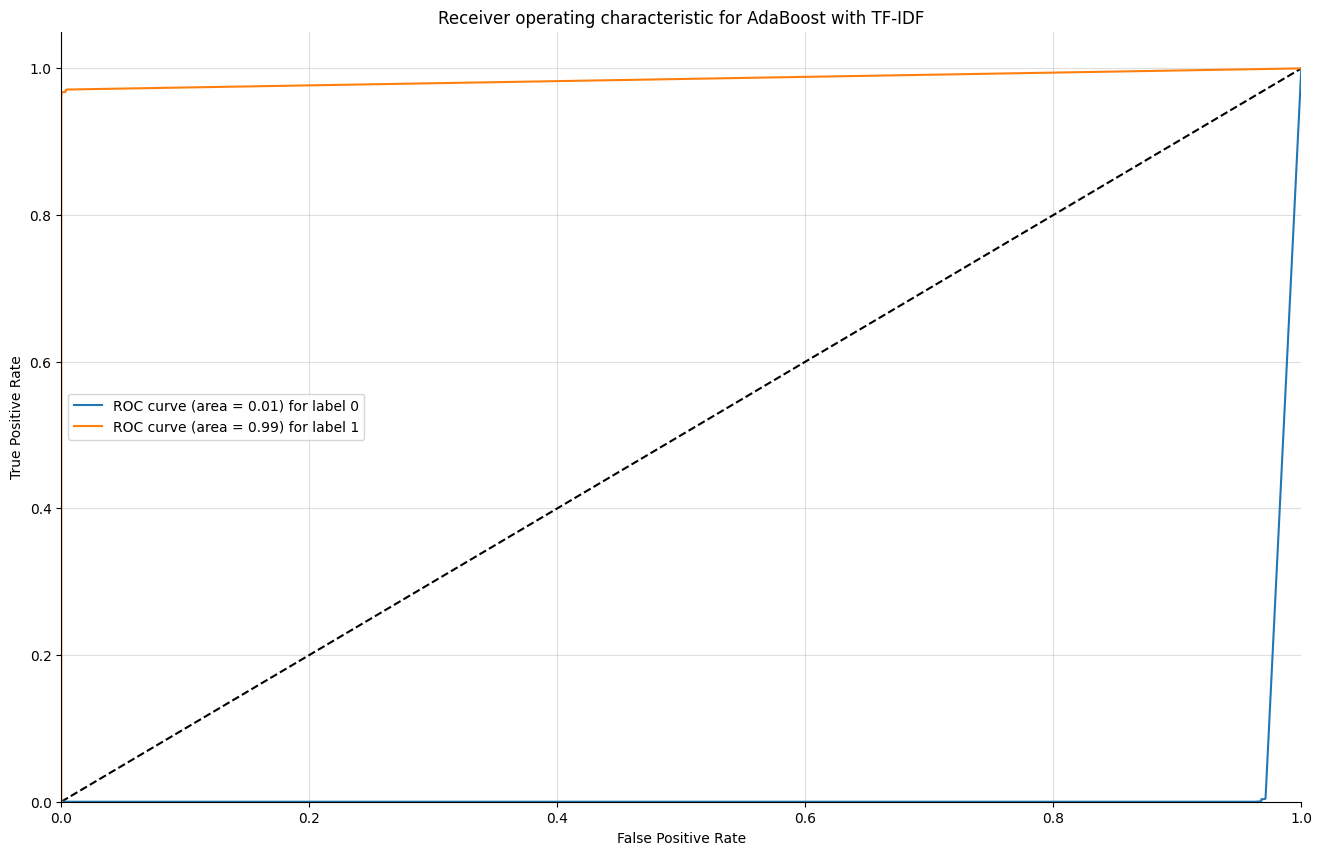

In [ ]:
plot_multiclass_roc("AdaBoost", "TF-IDF", ada_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

AdaBoost Model, F1-score is: 0.8363340384743426
####################################################################################################


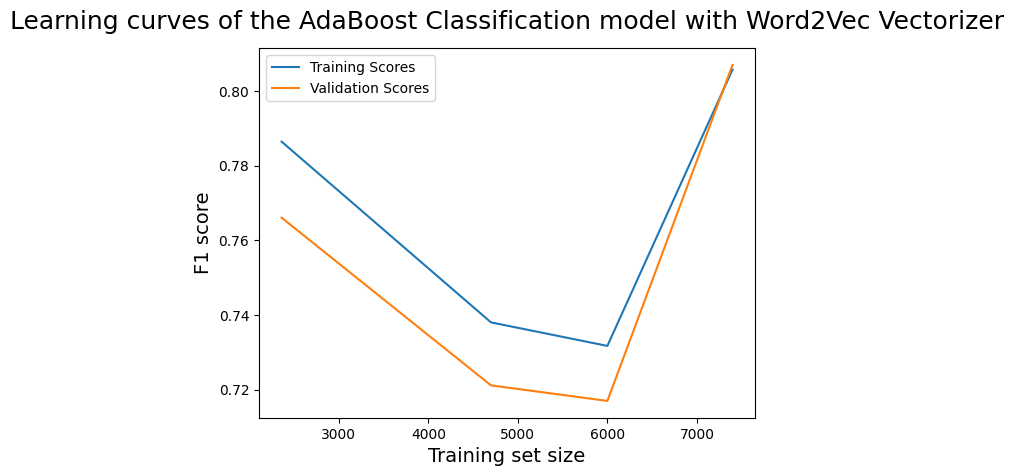

####################################################################################################
AdaBoost Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      1600
           1       0.53      0.88      0.66       463

    accuracy                           0.80      2063
   macro avg       0.75      0.83      0.76      2063
weighted avg       0.86      0.80      0.81      2063

####################################################################################################
AdaBoost Model, Validation score is: 0.7609203239850213
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ada_obj, "AdaBoost", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = False, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using AdaBoost Classifier with Word2Vec Vectorizer by evaluating it using Validation set.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603
0     Multinomial NB   Word2Vec        0.778505       0.346990
0           AdaBoost      Count        0.975063       0.994396
0           AdaBoost     TF-IDF        0.979914       0.993690
0           AdaBoost   Word2Vec        0.836334       0.760920

### Gradient Boosting Classsifier model

In [ ]:
gb_obj = OneVsOneClassifier(GradientBoostingClassifier(learning_rate= 0.07, max_depth= 2, subsample= 0.25, n_estimators= 60, random_state= 42))

#### Count Vectorizer

Gradient Boosting Model, F1-score is: 0.9716961117264715
####################################################################################################

  Gradient Boosting Classification with Count Vectorizer Cross Validation Mean Result is: 0.9716168554205208
  Gradient Boosting Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.0033100142818316657
  Gradient Boosting Classification with Count Vectorizer Cross Validation Score Result is:
[0.9742016  0.97537571 0.96871945 0.97302728 0.96676023]
####################################################################################################


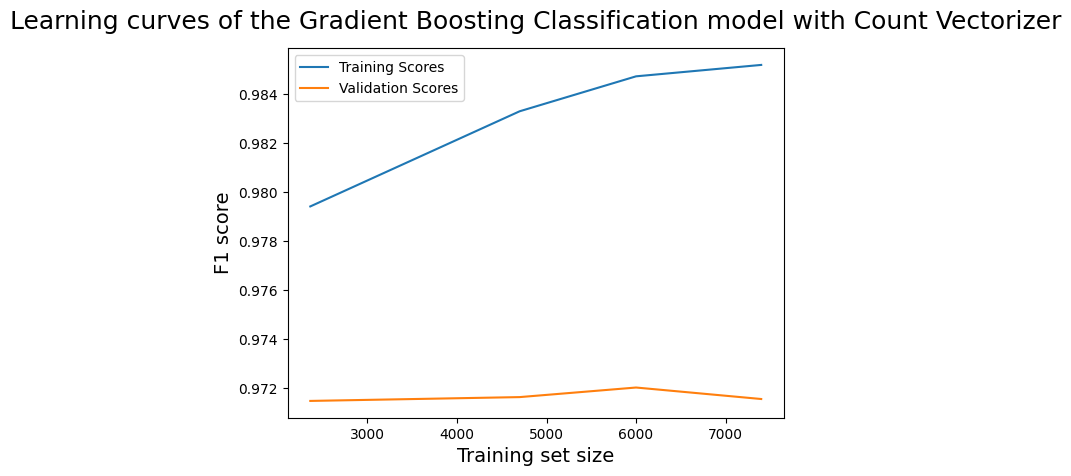

####################################################################################################
Gradient Boosting Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Gradient Boosting Model, Validation score is: 0.9887212290197365
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(gb_obj, "Gradient Boosting", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using GBoosting Classifier with Count Vectorizer, but there is some underfit and by increasing the data I think the performance will be better.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(gb_obj, "Gradient Boosting", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Gradient Boosting Model, F1-score is: 0.9765496183206106
####################################################################################################

  Gradient Boosting Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9770188563177638
  Gradient Boosting Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.00197036358575831
  Gradient Boosting Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.97733211 0.97967912 0.97615834 0.97811453 0.97381019]
####################################################################################################
Gradient Boosting Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99    

**Discussion Stage**
* There is some underfit using Gradient Boosting Classifier with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603
0     Multinomial NB   Word2Vec        0.778505       0.346990
0           AdaBoost      Count        0.975063       0.994396
0           AdaBoost     TF-IDF        0.979914       0.993690
0           AdaBoost   Word2Vec        0.836334       0.760920
0  Gradient Boosting      Count        0.971696       0.988721
0  Gradient Boosting     TF-IDF        0.976550       0.990147

#### Compute ROC of the best performance

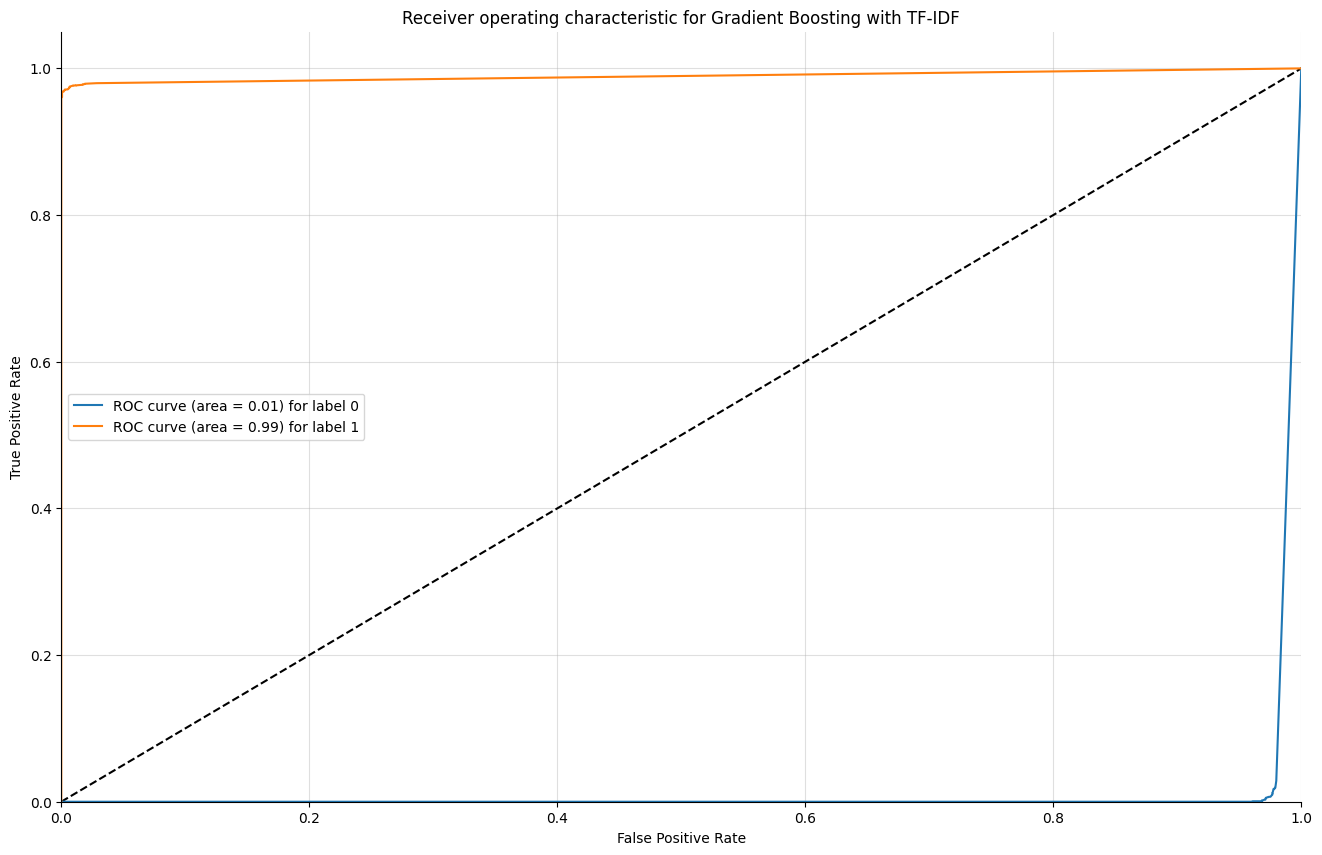

In [ ]:
plot_multiclass_roc("Gradient Boosting", "TF-IDF", gb_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

Gradient Boosting Model, F1-score is: 0.8817641076650405
####################################################################################################

  Gradient Boosting Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8781731488509197
  Gradient Boosting Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.008736487460409234
  Gradient Boosting Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.86132336 0.87960255 0.88197066 0.88136676 0.8866024 ]
####################################################################################################


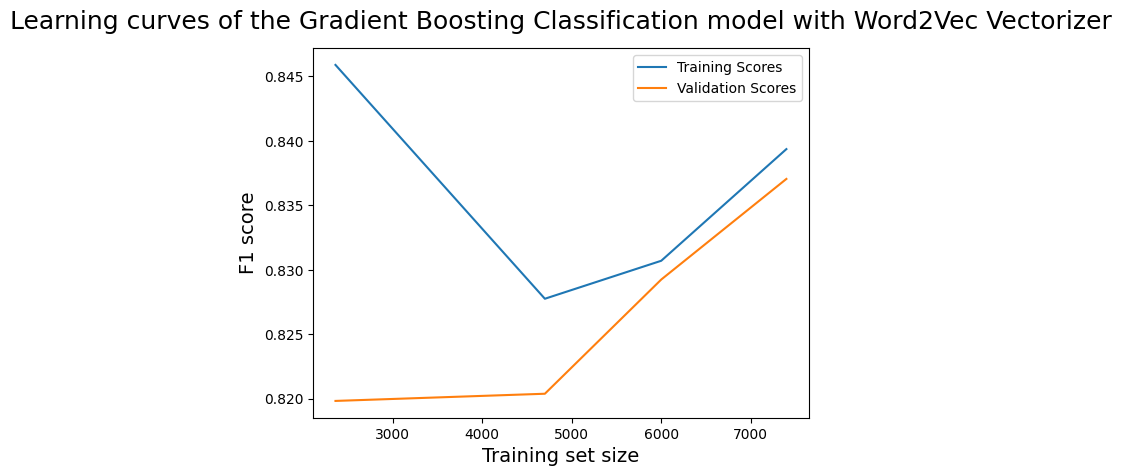

####################################################################################################
Gradient Boosting Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1600
           1       0.62      0.88      0.73       463

    accuracy                           0.85      2063
   macro avg       0.79      0.86      0.81      2063
weighted avg       0.88      0.85      0.86      2063

####################################################################################################
Gradient Boosting Model, Validation score is: 0.8130026066672551
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(gb_obj, "Gradient Boosting", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using Gradient Boosting Classifier with Word2Vec Vectorizer, and the result is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0      Decision Tree      Count        0.973262       0.990858
0      Decision Tree     TF-IDF        0.997344       0.988878
0      Decision Tree   Word2Vec        0.861625       0.767129
0      Random Forest      Count        0.794379       0.645083
0      Random Forest     TF-IDF        0.966700       0.961137
0      Random Forest   Word2Vec        0.882945       0.806434
0        Extra Trees      Count        0.786464       0.617812
0        Extra Trees     TF-IDF        0.783088       0.840631
0        Extra Trees   Word2Vec        0.866544       0.791112
0                KNN      Count        0.749434       0.519039
0                KNN     TF-IDF        0.658473       0.455993
0                KNN   Word2Vec        0.889909       0.743624
0                SVC      Count        0.982182       0.976756
0                SVC     TF-IDF        0.979294       0.946361
0                SVC   Word2Vec        0.802739       0.739623
0            XGBoost      Count        0.973027       0.988721
0            XGBoost     TF-IDF        0.973810       0.988721
0            XGBoost   Word2Vec        0.867251       0.797262
0     SGD Classifier      Count        0.978272       0.992324
0     SGD Classifier     TF-IDF        0.959704       0.991620
0     SGD Classifier   Word2Vec        0.800410       0.743158
0  Voting Classifier      Count        0.982808       0.992324
0  Voting Classifier     TF-IDF        0.968719       0.988721
0  Voting Classifier   Word2Vec        0.859336       0.787814
0     Multinomial NB      Count        0.979683       0.826430
0     Multinomial NB     TF-IDF        0.958421       0.890603
0     Multinomial NB   Word2Vec        0.778505       0.346990
0           AdaBoost      Count        0.975063       0.994396
0           AdaBoost     TF-IDF        0.979914       0.993690
0           AdaBoost   Word2Vec        0.836334       0.760920
0  Gradient Boosting      Count        0.971696       0.988721
0  Gradient Boosting     TF-IDF        0.976550       0.990147
0  Gradient Boosting   Word2Vec        0.881764       0.813003

### Bagging Classifier model

In [ ]:
# Create an object the of Bagging Classifier.
bag_object = BaggingClassifier(GradientBoostingClassifier(learning_rate= 0.05, max_depth= 2, n_estimators= 50, random_state= 42),
                               n_estimators=20, bootstrap=True, random_state=42)

#### Count Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(bag_object, "Bagging Classifier", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Bagging Classifier Model, F1-score is: 0.9714611689100834
####################################################################################################
Bagging Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Bagging Classifier Model, Validation score is: 0.9887212290197365
####################################################################################################


**Discussion Stage**
* There is no overfit using Bagging Classifier with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(bag_object, "Bagging Classifier", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Bagging Classifier Model, F1-score is: 0.9765496183206106
####################################################################################################
Bagging Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.97      0.98       463

    accuracy                           0.99      2063
   macro avg       1.00      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Bagging Classifier Model, Validation score is: 0.9901465900282755
####################################################################################################


**Discussion Stage**
* There is no overfit using Bagging Classifier with TF-IDF Vectorizer but by evaluating it Validation set I think there is an underfit.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0       Decision Tree      Count        0.973262       0.990858
0       Decision Tree     TF-IDF        0.997344       0.988878
0       Decision Tree   Word2Vec        0.861625       0.767129
0       Random Forest      Count        0.794379       0.645083
0       Random Forest     TF-IDF        0.966700       0.961137
0       Random Forest   Word2Vec        0.882945       0.806434
0         Extra Trees      Count        0.786464       0.617812
0         Extra Trees     TF-IDF        0.783088       0.840631
0         Extra Trees   Word2Vec        0.866544       0.791112
0                 KNN      Count        0.749434       0.519039
0                 KNN     TF-IDF        0.658473       0.455993
0                 KNN   Word2Vec        0.889909       0.743624
0                 SVC      Count        0.982182       0.976756
0                 SVC     TF-IDF        0.979294       0.946361
0                 SVC   Word2Vec        0.802739       0.739623
0             XGBoost      Count        0.973027       0.988721
0             XGBoost     TF-IDF        0.973810       0.988721
0             XGBoost   Word2Vec        0.867251       0.797262
0      SGD Classifier      Count        0.978272       0.992324
0      SGD Classifier     TF-IDF        0.959704       0.991620
0      SGD Classifier   Word2Vec        0.800410       0.743158
0   Voting Classifier      Count        0.982808       0.992324
0   Voting Classifier     TF-IDF        0.968719       0.988721
0   Voting Classifier   Word2Vec        0.859336       0.787814
0      Multinomial NB      Count        0.979683       0.826430
0      Multinomial NB     TF-IDF        0.958421       0.890603
0      Multinomial NB   Word2Vec        0.778505       0.346990
0            AdaBoost      Count        0.975063       0.994396
0            AdaBoost     TF-IDF        0.979914       0.993690
0            AdaBoost   Word2Vec        0.836334       0.760920
0   Gradient Boosting      Count        0.971696       0.988721
0   Gradient Boosting     TF-IDF        0.976550       0.990147
0   Gradient Boosting   Word2Vec        0.881764       0.813003
0  Bagging Classifier      Count        0.971461       0.988721
0  Bagging Classifier     TF-IDF        0.976550       0.990147

#### Compute ROC of the best performance

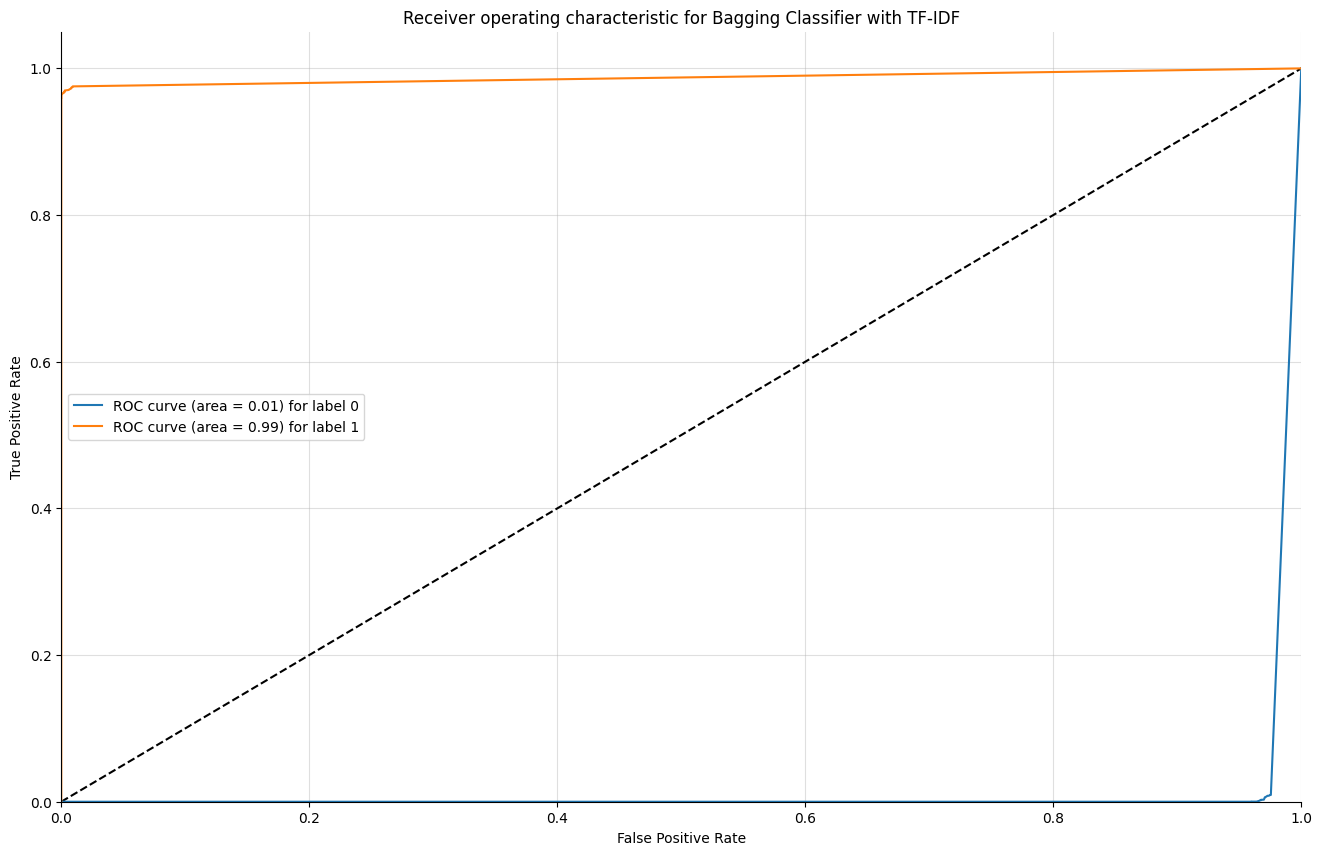

In [ ]:
plot_multiclass_roc("Bagging Classifier", "TF-IDF", bag_object, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(bag_object, "Bagging Classifier", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = False, learning_plot_use = False)

Bagging Classifier Model, F1-score is: 0.8674906099690874
####################################################################################################
Bagging Classifier Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1600
           1       0.59      0.88      0.71       463

    accuracy                           0.84      2063
   macro avg       0.78      0.85      0.80      2063
weighted avg       0.88      0.84      0.85      2063

####################################################################################################
Bagging Classifier Model, Validation score is: 0.7983864027475962
####################################################################################################


**Discussion Stage**
* There is an overfit using Bagging Classifier with Word2Vec Vectorizer, and the result is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0       Decision Tree      Count        0.973262       0.990858
0       Decision Tree     TF-IDF        0.997344       0.988878
0       Decision Tree   Word2Vec        0.861625       0.767129
0       Random Forest      Count        0.794379       0.645083
0       Random Forest     TF-IDF        0.966700       0.961137
0       Random Forest   Word2Vec        0.882945       0.806434
0         Extra Trees      Count        0.786464       0.617812
0         Extra Trees     TF-IDF        0.783088       0.840631
0         Extra Trees   Word2Vec        0.866544       0.791112
0                 KNN      Count        0.749434       0.519039
0                 KNN     TF-IDF        0.658473       0.455993
0                 KNN   Word2Vec        0.889909       0.743624
0                 SVC      Count        0.982182       0.976756
0                 SVC     TF-IDF        0.979294       0.946361
0                 SVC   Word2Vec        0.802739       0.739623
0             XGBoost      Count        0.973027       0.988721
0             XGBoost     TF-IDF        0.973810       0.988721
0             XGBoost   Word2Vec        0.867251       0.797262
0      SGD Classifier      Count        0.978272       0.992324
0      SGD Classifier     TF-IDF        0.959704       0.991620
0      SGD Classifier   Word2Vec        0.800410       0.743158
0   Voting Classifier      Count        0.982808       0.992324
0   Voting Classifier     TF-IDF        0.968719       0.988721
0   Voting Classifier   Word2Vec        0.859336       0.787814
0      Multinomial NB      Count        0.979683       0.826430
0      Multinomial NB     TF-IDF        0.958421       0.890603
0      Multinomial NB   Word2Vec        0.778505       0.346990
0            AdaBoost      Count        0.975063       0.994396
0            AdaBoost     TF-IDF        0.979914       0.993690
0            AdaBoost   Word2Vec        0.836334       0.760920
0   Gradient Boosting      Count        0.971696       0.988721
0   Gradient Boosting     TF-IDF        0.976550       0.990147
0   Gradient Boosting   Word2Vec        0.881764       0.813003
0  Bagging Classifier      Count        0.971461       0.988721
0  Bagging Classifier     TF-IDF        0.976550       0.990147
0  Bagging Classifier   Word2Vec        0.867491       0.798386

### Logistic Regression model

#### Count Vectorizer

In [ ]:
# Create an object the of Logistic Regression.
lg_obj = LogisticRegression(max_iter= 500, multi_class='multinomial', random_state=42)

Logistic Regression Model, F1-score is: 0.982181846564403
####################################################################################################

  Logistic Regression Classification with Count Vectorizer Cross Validation Mean Result is: 0.9691836804424316
  Logistic Regression Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.008201365254637908
  Logistic Regression Classification with Count Vectorizer Cross Validation Score Result is:
[0.95380811 0.97459588 0.97302728 0.97655128 0.96793585]
####################################################################################################


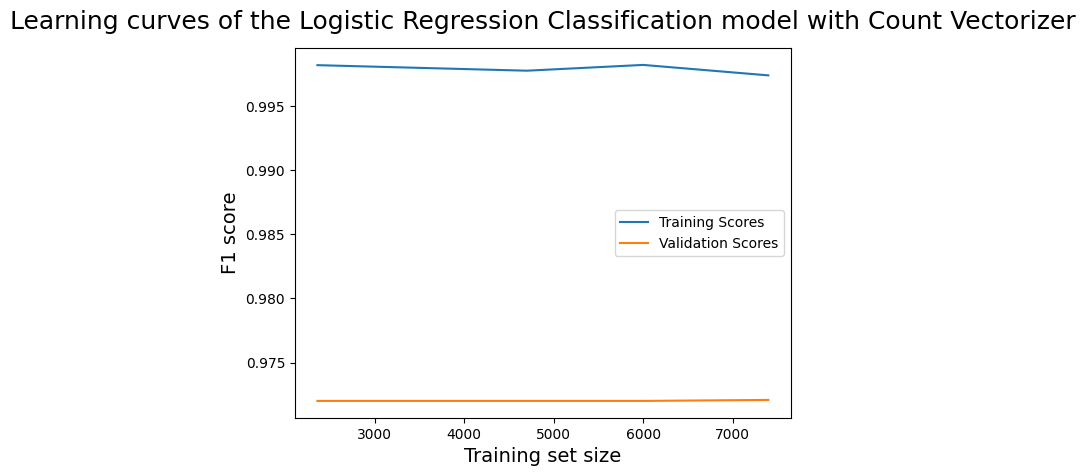

####################################################################################################
Logistic Regression Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1600
           1       1.00      0.95      0.98       463

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.98      2063
weighted avg       0.99      0.99      0.99      2063

####################################################################################################
Logistic Regression Model, Validation score is: 0.9844178298533863
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(lg_obj, "Logistic Regression", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is no overfit using Logistic Regression with Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(lg_obj, "Logistic Regression", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Logistic Regression Model, F1-score is: 0.9830442586786111
####################################################################################################

  Logistic Regression Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9635728946365582
  Logistic Regression Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.007404903860728434
  Logistic Regression Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.95975427 0.97499994 0.96677923 0.96365386 0.95267718]
####################################################################################################
Logistic Regression Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1600
           1       0.95      0.98      0.96       463

    accuracy                           0.98      2063
   macro avg       0.97      0.98      0.98      2063
weighted avg    

**Discussion Stage**
* There is no overfit using Logistic Regression with TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649

#### Compute ROC of the best performance

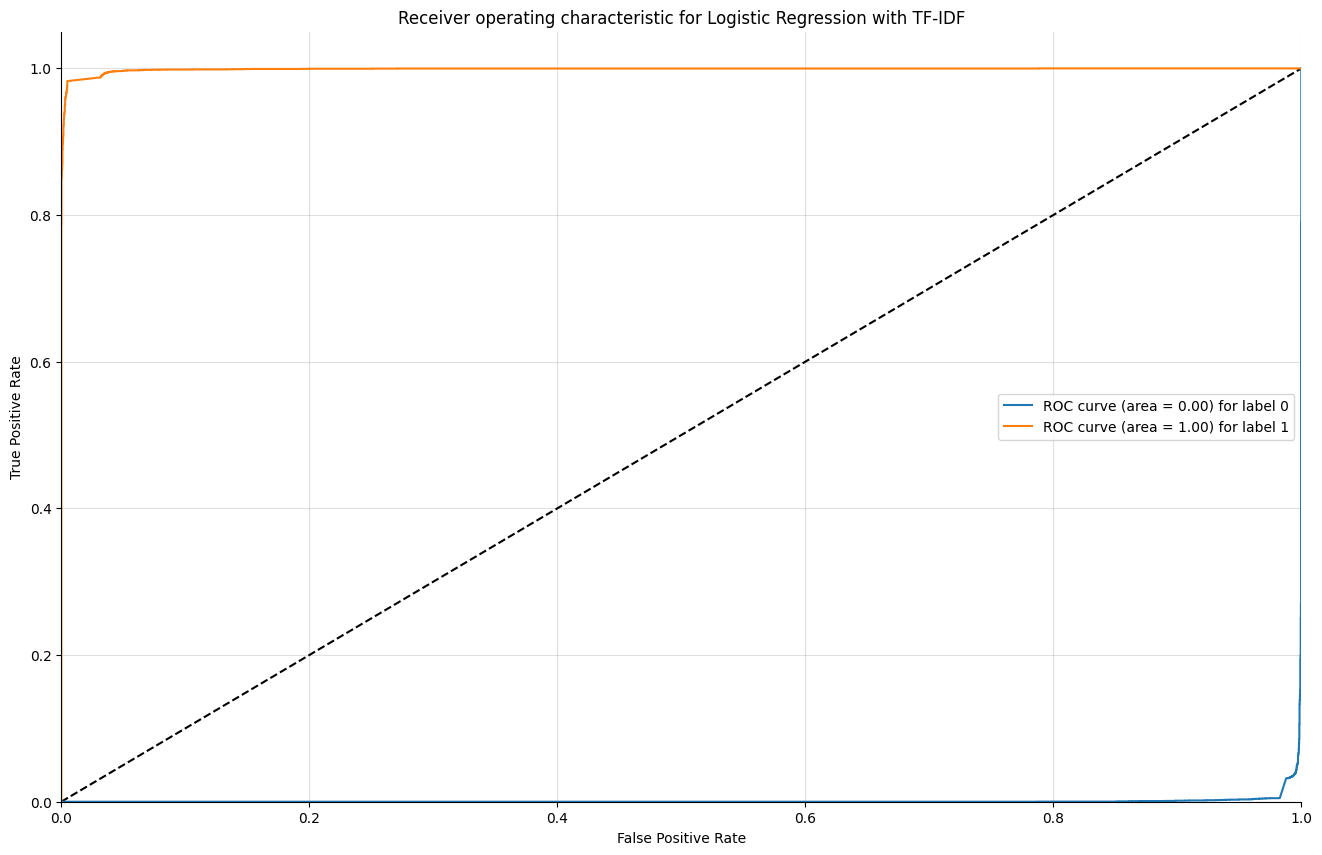

In [ ]:
plot_multiclass_roc("Logistic Regression", "TF-IDF", lg_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

Logistic Regression Model, F1-score is: 0.7971418569178064
####################################################################################################

  Logistic Regression Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.7957813203155968
  Logistic Regression Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.006709613726481057
  Logistic Regression Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.78827492 0.80180067 0.80077821 0.78690645 0.80114636]
####################################################################################################


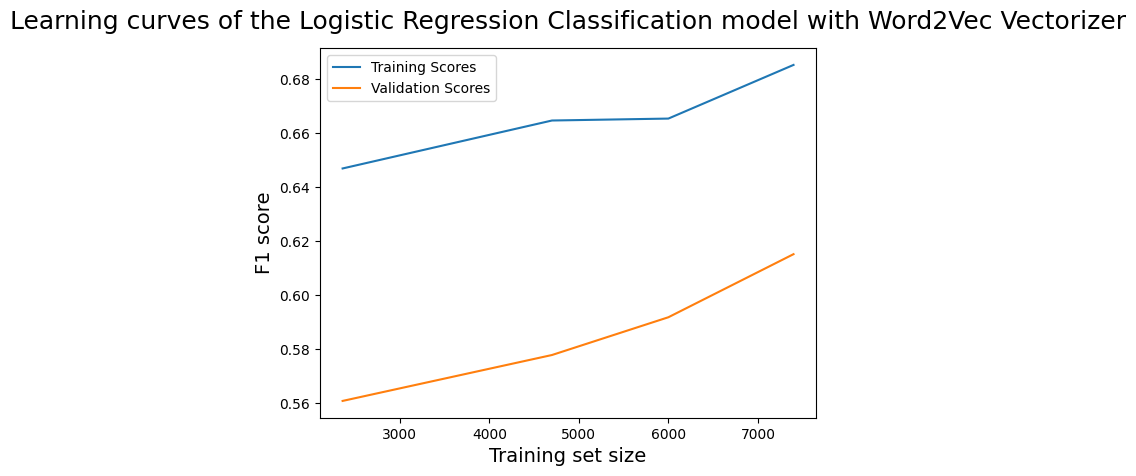

####################################################################################################
Logistic Regression Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      1600
           1       0.53      0.81      0.64       463

    accuracy                           0.79      2063
   macro avg       0.73      0.80      0.75      2063
weighted avg       0.84      0.79      0.81      2063

####################################################################################################
Logistic Regression Model, Validation score is: 0.7478115368442955
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(lg_obj, "Logistic Regression", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using Logistic Regression with Word2Vec Vectorizer, and the result is bad.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812

### Stacking Classifier model

#### Count Vectorizer

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth= 2, random_state= 42, max_features= 5)),
              ('svr', SVC(random_state=42)),
              ('sgd', OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42)))]
stack_obj = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(max_iter= 3000)
)

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(stack_obj, "Stacking Classifer", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Stacking Classifer Model, F1-score is: 0.9782717247824755
####################################################################################################

  Stacking Classifer Classification with Count Vectorizer Cross Validation Mean Result is: 0.9728769422440949
  Stacking Classifer Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.005134484768819475
  Stacking Classifer Classification with Count Vectorizer Cross Validation Score Result is:
[0.97850838 0.97811911 0.96794995 0.9738193  0.96598797]
####################################################################################################
Stacking Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.99      0.98      0.99       463

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99 

**Discussion Stage**
* There is no overfit using Stacking Classifier and Count Vectorizer, but by evaluating it on the Validation set I think there is an underfit.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(stack_obj, "Stacking Classifer", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Stacking Classifer Model, F1-score is: 0.9841385895620456
####################################################################################################

  Stacking Classifer Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9800762089949522
  Stacking Classifer Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.00696579588942557
  Stacking Classifer Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.96757729 0.98046703 0.98359275 0.98867096 0.98007301]
####################################################################################################
Stacking Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1600
           1       0.93      0.98      0.96       463

    accuracy                           0.98      2063
   macro avg       0.96      0.98      0.97      2063
weighted avg       0.9

**Discussion Stage**
* There is no overfit using Stacking Classifer and TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812
0   Stacking Classifer      Count        0.978272       0.992324
0   Stacking Classifer     TF-IDF        0.984139       0.971367

#### Compute ROC of the best performance

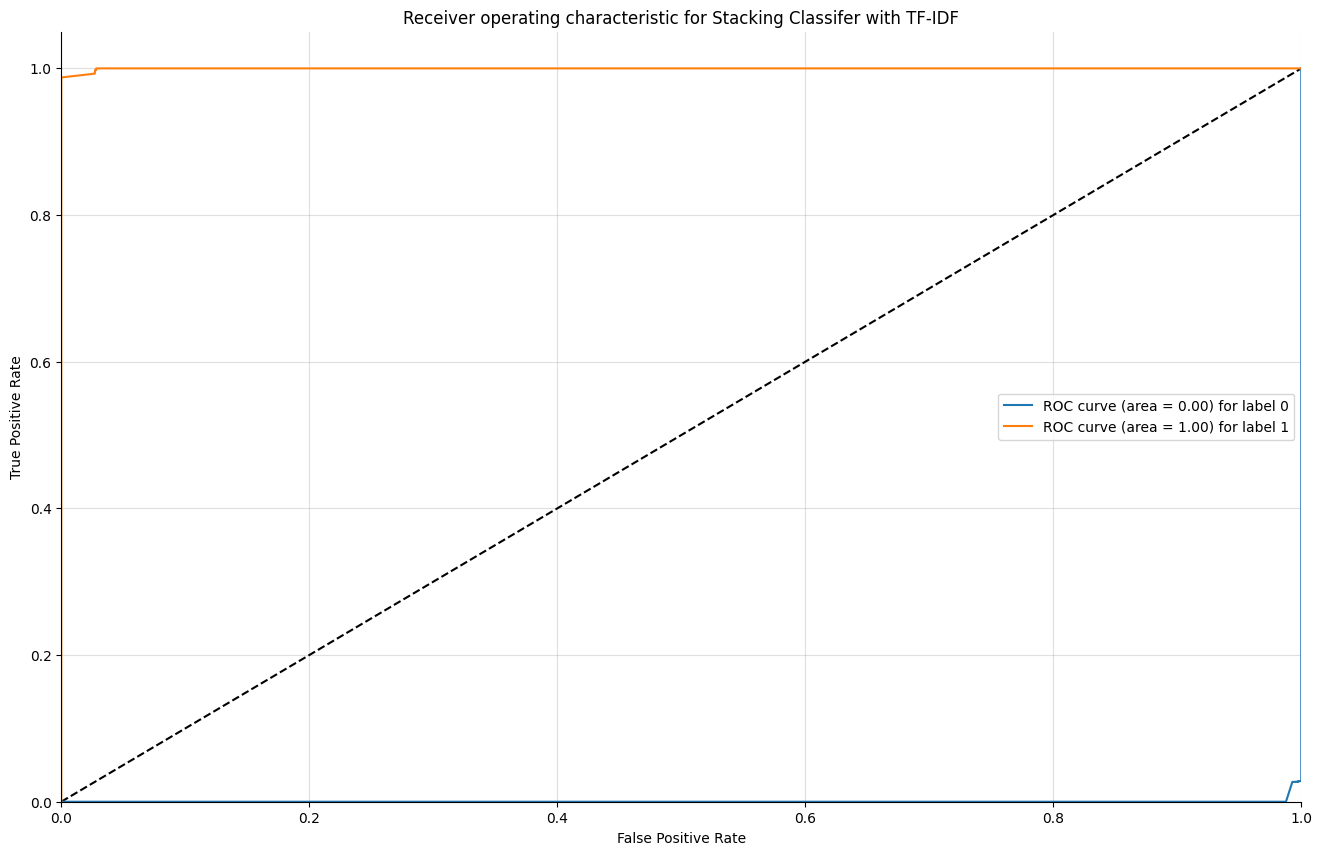

In [ ]:
plot_multiclass_roc("Stacking Classifer", "TF-IDF", stack_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(stack_obj, "Stacking Classifer", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Stacking Classifer Model, F1-score is: 0.8884401198513805
####################################################################################################

  Stacking Classifer Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.8840941018257549
  Stacking Classifer Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.010927511890314512
  Stacking Classifer Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.86288709 0.88779432 0.88538904 0.89271704 0.89168301]
####################################################################################################
Stacking Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1600
           1       0.65      0.88      0.75       463

    accuracy                           0.87      2063
   macro avg       0.81      0.87      0.83      2063
weighted avg   

**Discussion Stage**
* There is an overfit using Stacking Classifer with Word2Vec Vectorizer.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812
0   Stacking Classifer      Count        0.978272       0.992324
0   Stacking Classifer     TF-IDF        0.984139       0.971367
0   Stacking Classifer   Word2Vec        0.888440       0.828462

### Ridge Classifier model

#### Count Vectorizer

In [ ]:
ridge_obj = RidgeClassifier()

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ridge_obj, "Ridge Classifer", "Count", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = count_training_data, training_labels = count_training_labels, val_data = count_val_data, val_labels = count_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Ridge Classifer Model, F1-score is: 0.982181846564403
####################################################################################################

  Ridge Classifer Classification with Count Vectorizer Cross Validation Mean Result is: 0.9614671486088598
  Ridge Classifer Classification with Count Vectorizer Cross Validation Standard Deviation Result is: 0.01861496520911134
  Ridge Classifer Classification with Count Vectorizer Cross Validation Score Result is:
[0.92500741 0.96519954 0.97342089 0.97577047 0.96793744]
####################################################################################################
Ridge Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1600
           1       1.00      0.90      0.95       463

    accuracy                           0.98      2063
   macro avg       0.99      0.95      0.97      2063
weighted avg       0.98      0.98      0.

**Discussion Stage**
* There is no overfit using Stacking Classifier and Count Vectorizer.

In [ ]:
count_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, count_dt], axis = 0)

#### TF-IDF Vectorizer

In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ridge_obj, "Ridge Classifer", "TF-IDF", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = tfidf_training_data, training_labels = tfidf_training_labels, val_data = tfidf_val_data, val_labels = tfidf_val_labels,
                                                               cross_val_use = True, learning_plot_use = False)

Ridge Classifer Model, F1-score is: 0.9540351904393196
####################################################################################################

  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Mean Result is: 0.9203516301505015
  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Standard Deviation Result is: 0.02193092836586663
  Ridge Classifer Classification with TF-IDF Vectorizer Cross Validation Score Result is:
[0.88507987 0.9041356  0.93659739 0.94050702 0.93543826]
####################################################################################################
Ridge Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1600
           1       0.68      0.85      0.75       463

    accuracy                           0.88      2063
   macro avg       0.82      0.87      0.84      2063
weighted avg       0.89      0.88    

**Discussion Stage**
* There is an overfit using Ridge Classifer and TF-IDF Vectorizer.

In [ ]:
tfidf_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, tfidf_dt], axis = 0)
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812
0   Stacking Classifer      Count        0.978272       0.992324
0   Stacking Classifer     TF-IDF        0.984139       0.971367
0   Stacking Classifer   Word2Vec        0.888440       0.828462
0      Ridge Classifer      Count        0.982182       0.966833
0      Ridge Classifer     TF-IDF        0.954035       0.835655

#### Compute ROC of the best performance

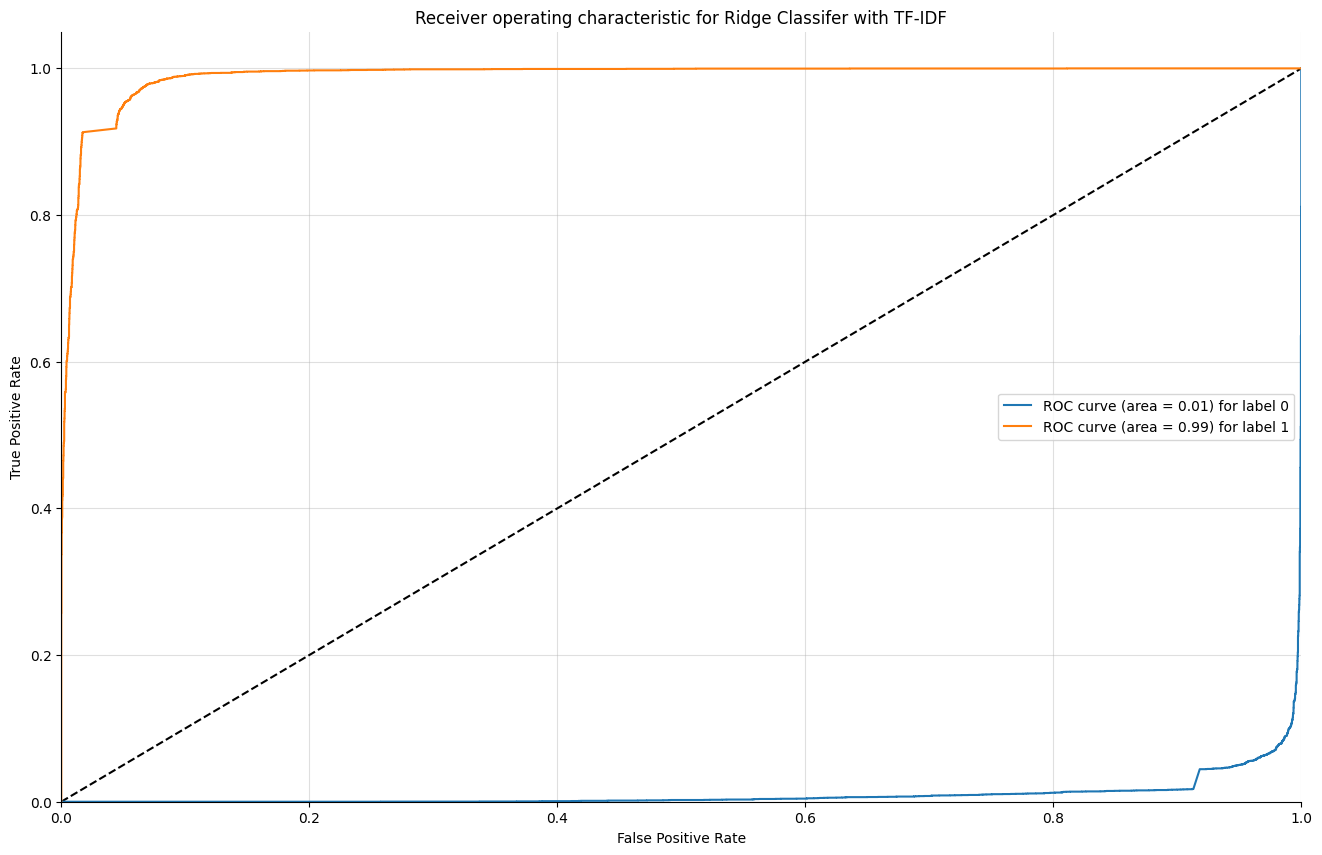

In [ ]:
plot_multiclass_roc("Ridge Classifer", "TF-IDF", ridge_obj, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

#### Word2Vec

Ridge Classifer Model, F1-score is: 0.7997697929003122
####################################################################################################

  Ridge Classifer Classification with Word2Vec Vectorizer Cross Validation Mean Result is: 0.798881369378108
  Ridge Classifer Classification with Word2Vec Vectorizer Cross Validation Standard Deviation Result is: 0.008177685163976347
  Ridge Classifer Classification with Word2Vec Vectorizer Cross Validation Score Result is:
[0.78905787 0.80530607 0.80699721 0.78878972 0.80425599]
####################################################################################################


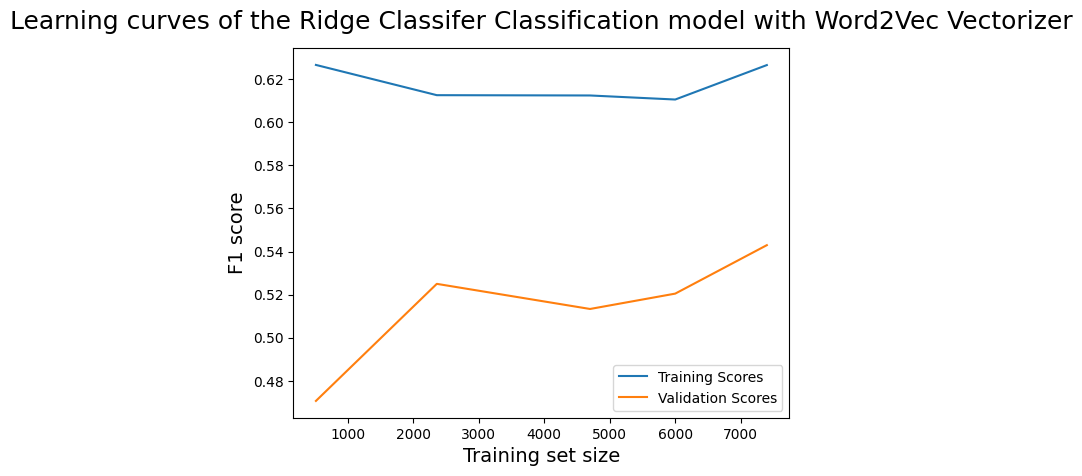

####################################################################################################
Ridge Classifer Model Classification Report score is:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1600
           1       0.52      0.81      0.63       463

    accuracy                           0.79      2063
   macro avg       0.73      0.80      0.74      2063
weighted avg       0.84      0.79      0.80      2063

####################################################################################################
Ridge Classifer Model, Validation score is: 0.743831772819898
####################################################################################################


In [ ]:
model_name, vectorizer_name, model_score, model_test_score = classifier_process(ridge_obj, "Ridge Classifer", "Word2Vec", f1_average = "macro",
                                                               learninig_score = 'f1_macro',
                                                               training_data = word2vec_training_data, training_labels = word2vec_training_labels, val_data = word2vec_val_data, val_labels = word2vec_val_labels,
                                                               cross_val_use = True, learning_plot_use = True)

**Discussion Stage**
* There is an overfit using Ridge Classifer with Word2Vec Vectorizer when I evaluating it on test set.

In [ ]:
word2vec_dt = pd.DataFrame(data = [[model_name, vectorizer_name, model_score, model_test_score]], columns =["Algorithm", "Vectorizer", "F1 train score", "F1 test score"])
results_in_csv= pd.concat([results_in_csv, word2vec_dt], axis = 0)

In [ ]:
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812
0   Stacking Classifer      Count        0.978272       0.992324
0   Stacking Classifer     TF-IDF        0.984139       0.971367
0   Stacking Classifer   Word2Vec        0.888440       0.828462
0      Ridge Classifer      Count        0.982182       0.966833
0      Ridge Classifer     TF-IDF        0.954035       0.835655
0      Ridge Classifer   Word2Vec        0.799770       0.743832

# Error Analysis

In [ ]:
def error_analysis(model, x, y):
    ''' this function show the confusion matrix of the model
    and the error the model make 
    Arge:
    model: model we want to use
    x: training data
    y: testing data
    '''
    # got predicted values
    y_pred = cross_val_predict(model, x, y, cv=3)
    # got confusion matrix
    conf_mx = confusion_matrix(y, y_pred)
    # show the matrix 
    plt.figure(figsize= (15, 10))
    fig, axs = plt.subplots(1, 2)
    
    sns.heatmap(conf_mx, ax = axs[0])
    axs[0].grid(False)
    axs[0].set_title("Confusion Matrix")
    axs[0].set_xlabel("Ture Class")
    axs[0].set_ylabel("Predicted Class")

    # got sum each row in confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    # divide each value by the corresponding sum
    norm_conf_mx = conf_mx / row_sums
    # fill diagonal in confusion matrix
    np.fill_diagonal(norm_conf_mx, 0)
    # show the matrix 
    
    sns.heatmap(norm_conf_mx, ax = axs[1])
    axs[1].grid(False)
    axs[1].set_title("error ratio")
    axs[1].set_xlabel("Ture Class")
    axs[1].set_ylabel("Predicted Class")
    fig.tight_layout()
    return plt.show()

**Now it's time to see the variety of algorithm results in a graph**

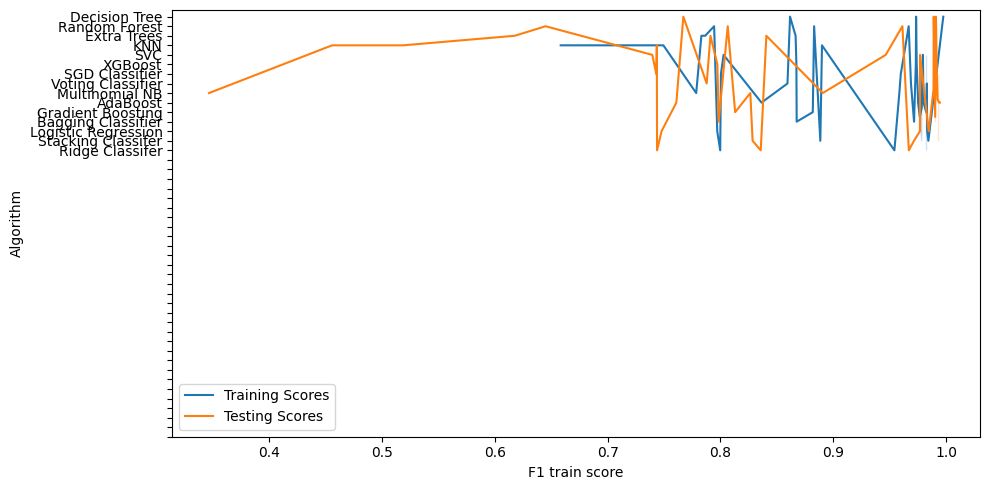

In [ ]:
plt.figure(figsize=(10, 5))
# visualizing the training Scores of all the models
results_in_csv.sort_values(by=['F1 test score'], ascending= True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 train score'], label= "Training Scores", dashes=False, markers=True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 test score'], label= "Testing Scores", dashes=False, markers=True)
plt.yticks(range(len(results_in_csv['Algorithm'])))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Algorithms results
results_in_csv

Algorithm Vectorizer  F1 train score  F1 test score
0        Decision Tree      Count        0.973262       0.990858
0        Decision Tree     TF-IDF        0.997344       0.988878
0        Decision Tree   Word2Vec        0.861625       0.767129
0        Random Forest      Count        0.794379       0.645083
0        Random Forest     TF-IDF        0.966700       0.961137
0        Random Forest   Word2Vec        0.882945       0.806434
0          Extra Trees      Count        0.786464       0.617812
0          Extra Trees     TF-IDF        0.783088       0.840631
0          Extra Trees   Word2Vec        0.866544       0.791112
0                  KNN      Count        0.749434       0.519039
0                  KNN     TF-IDF        0.658473       0.455993
0                  KNN   Word2Vec        0.889909       0.743624
0                  SVC      Count        0.982182       0.976756
0                  SVC     TF-IDF        0.979294       0.946361
0                  SVC   Word2Vec        0.802739       0.739623
0              XGBoost      Count        0.973027       0.988721
0              XGBoost     TF-IDF        0.973810       0.988721
0              XGBoost   Word2Vec        0.867251       0.797262
0       SGD Classifier      Count        0.978272       0.992324
0       SGD Classifier     TF-IDF        0.959704       0.991620
0       SGD Classifier   Word2Vec        0.800410       0.743158
0    Voting Classifier      Count        0.982808       0.992324
0    Voting Classifier     TF-IDF        0.968719       0.988721
0    Voting Classifier   Word2Vec        0.859336       0.787814
0       Multinomial NB      Count        0.979683       0.826430
0       Multinomial NB     TF-IDF        0.958421       0.890603
0       Multinomial NB   Word2Vec        0.778505       0.346990
0             AdaBoost      Count        0.975063       0.994396
0             AdaBoost     TF-IDF        0.979914       0.993690
0             AdaBoost   Word2Vec        0.836334       0.760920
0    Gradient Boosting      Count        0.971696       0.988721
0    Gradient Boosting     TF-IDF        0.976550       0.990147
0    Gradient Boosting   Word2Vec        0.881764       0.813003
0   Bagging Classifier      Count        0.971461       0.988721
0   Bagging Classifier     TF-IDF        0.976550       0.990147
0   Bagging Classifier   Word2Vec        0.867491       0.798386
0  Logistic Regression      Count        0.982182       0.984418
0  Logistic Regression     TF-IDF        0.983044       0.976649
0  Logistic Regression   Word2Vec        0.797142       0.747812
0   Stacking Classifer      Count        0.978272       0.992324
0   Stacking Classifer     TF-IDF        0.984139       0.971367
0   Stacking Classifer   Word2Vec        0.888440       0.828462
0      Ridge Classifer      Count        0.982182       0.966833
0      Ridge Classifer     TF-IDF        0.954035       0.835655
0      Ridge Classifer   Word2Vec        0.799770       0.743832

In [ ]:
results_in_csv.set_index("Algorithm")

Vectorizer  F1 train score  F1 test score
Algorithm                                                    
Decision Tree            Count        0.973262       0.990858
Decision Tree           TF-IDF        0.997344       0.988878
Decision Tree         Word2Vec        0.861625       0.767129
Random Forest            Count        0.794379       0.645083
Random Forest           TF-IDF        0.966700       0.961137
Random Forest         Word2Vec        0.882945       0.806434
Extra Trees              Count        0.786464       0.617812
Extra Trees             TF-IDF        0.783088       0.840631
Extra Trees           Word2Vec        0.866544       0.791112
KNN                      Count        0.749434       0.519039
KNN                     TF-IDF        0.658473       0.455993
KNN                   Word2Vec        0.889909       0.743624
SVC                      Count        0.982182       0.976756
SVC                     TF-IDF        0.979294       0.946361
SVC                   Word2Vec        0.802739       0.739623
XGBoost                  Count        0.973027       0.988721
XGBoost                 TF-IDF        0.973810       0.988721
XGBoost               Word2Vec        0.867251       0.797262
SGD Classifier           Count        0.978272       0.992324
SGD Classifier          TF-IDF        0.959704       0.991620
SGD Classifier        Word2Vec        0.800410       0.743158
Voting Classifier        Count        0.982808       0.992324
Voting Classifier       TF-IDF        0.968719       0.988721
Voting Classifier     Word2Vec        0.859336       0.787814
Multinomial NB           Count        0.979683       0.826430
Multinomial NB          TF-IDF        0.958421       0.890603
Multinomial NB        Word2Vec        0.778505       0.346990
AdaBoost                 Count        0.975063       0.994396
AdaBoost                TF-IDF        0.979914       0.993690
AdaBoost              Word2Vec        0.836334       0.760920
Gradient Boosting        Count        0.971696       0.988721
Gradient Boosting       TF-IDF        0.976550       0.990147
Gradient Boosting     Word2Vec        0.881764       0.813003
Bagging Classifier       Count        0.971461       0.988721
Bagging Classifier      TF-IDF        0.976550       0.990147
Bagging Classifier    Word2Vec        0.867491       0.798386
Logistic Regression      Count        0.982182       0.984418
Logistic Regression     TF-IDF        0.983044       0.976649
Logistic Regression   Word2Vec        0.797142       0.747812
Stacking Classifer       Count        0.978272       0.992324
Stacking Classifer      TF-IDF        0.984139       0.971367
Stacking Classifer    Word2Vec        0.888440       0.828462
Ridge Classifer          Count        0.982182       0.966833
Ridge Classifer         TF-IDF        0.954035       0.835655
Ridge Classifer       Word2Vec        0.799770       0.743832

**Confusion matrix analysis**

<Figure size 1500x1000 with 0 Axes>

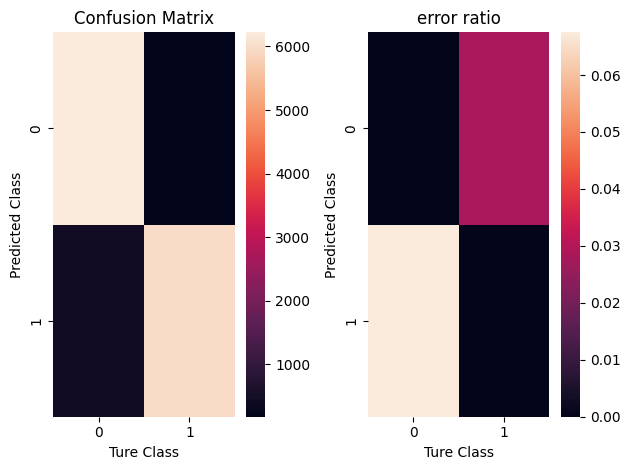

In [ ]:
# analyse the best classifier using confusion matrix
error_analysis(lg_obj, tfidf_training_data, tfidf_training_labels)

**Discussion Stage**\
The process of confusion matrix was Iterable..

Analyze the Best Models and Their Errors

In [ ]:
# check important features of the best model
#feature_importances = xgb_model.feature_importances_
feature_importances = [] 
for clf in gb_obj.estimators_:
    feature_importances.append(clf.feature_importances_)
feature_importances = np.mean(feature_importances, axis=0)
feature_importances

array([2.01477003e-03, 3.84147238e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.89240856e-02, 2.49952525e-03, 4.55459610e-03,
       0.00000000e+00, 4.21942166e-03, 1.13162562e-02, 0.00000000e+00,
       0.00000000e+00, 2.20466421e-02, 0.00000000e+00, 2.03317190e-03,
       0.00000000e+00, 9.27212559e-02, 0.00000000e+00, 0.00000000e+00,
       6.02351526e-03, 2.00742401e-03, 1.08584141e-02, 0.00000000e+00,
       0.00000000e+00, 6.05542898e-03, 9.06927470e-03, 3.19550535e-03,
       0.00000000e+00, 4.07811516e-04, 0.00000000e+00, 0.00000000e+00,
       1.52369911e-03, 1.18531452e-01, 4.71474355e-04, 1.62631595e-03,
       0.00000000e+00, 7.29964832e-04, 0.00000000e+00, 0.00000000e+00,
       2.76247209e-03, 9.26748277e-04, 1.25669227e-03, 3.50801467e-03,
       0.00000000e+00, 0.00000000e+00, 3.98821408e-03, 0.00000000e+00,
       0.00000000e+00, 1.20372975e-02, 1.28001640e-03, 3.19741206e-03,
       5.88246228e-04, 1.70704984e-03, 0.00000000e+00, 4.41241399e-02,
      

**Discussion Stage**\
This stage was iterabel stage, between different best models and chain feature elimination to get the best results.

# Parameters Choosing

## Halving Grid Search CV

**Note:** This is an iterative step and I will loop over a specific range of values depends on elimination values recursively.

**I will choose the best model with the best vectorizer**

### XGBoost Classifier Grid Search

In [ ]:
param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

search = HalvingGridSearchCV(XGBClassifier(random_state = 42), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  

In [ ]:
best_model_xgb = search.best_estimator_
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb_train_score_halving = f1_score(tfidf_training_labels, best_model_xgb.predict(tfidf_training_data), average= "weighted")
xgb_test_score_halving = f1_score(tfidf_val_labels, best_model_xgb.predict(tfidf_val_data), average= "weighted")
display(xgb_train_score_halving)
display(xgb_test_score_halving)

0.9811651980949131

0.995622130390801

**Discussion Stage**
* We have to loop over these values to determine the best of it, then decide the best estimator taken the possibility of overfit into consideration, but this step will take long time depend on the parameters that I tried (using a specific range of values depends on elimination values recursively).

### Logistic Reggression Classifier Grid Search

In [ ]:
# Define grid search
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l2','l1'],
              'C' : [0.01, 0.1, 0.5, 1.0, 5.0, 10]}

search = HalvingGridSearchCV(LogisticRegression(random_state = 42), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self

Best: 0.981165 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.465957 (0.017021) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.465957 (0.017021) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.468085 (0.016481) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.534043 (0.017021) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.814894 (0.126520) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.814894 (0.126520) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829787 (0.118080) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.978723 (0.011654) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.921277 (0.041802) with: {'C': 0.5, 'penalty': 'l2', '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.46595745 0.46595745 0.46808511        nan        nan 0.53404255
 0.81489362 0.81489362 0.82978723        nan        nan 0.9787234
 0.9212766  0.9212766  0.9212766         nan        nan 0.91702128
 0.92340426 0.92340426 0.92340426        nan        nan 0.93191489
 0.88723404 0.88723404 0.88723404        nan        nan 0.94893617
 0.86382979 0.86382979 0.86595745        nan        nan 0.95531915
 0.92887324 0.91830986 0.90352113 0.90352113 0.90352113 0.91408451
 0.91408451 0.91408451 0.92816901 0.95704225 0.96126761 0.88309859
 0.94912075 0.94982415 0.96623681 0.97162954 0.9773349  0.98116452]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.5176781  0.5176781  0.52295515        nan        nan 0.4823219
 0.93825858 0.93825858 0.94248021

In [ ]:
best_model_lr = search.best_estimator_
best_model_lr

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
lr_train_score_halving = f1_score(tfidf_training_labels, best_model_lr.predict(tfidf_training_data), average= "macro")
lr_test_score_halving = f1_score(tfidf_val_labels, best_model_lr.predict(tfidf_val_data), average= "macro")
display(lr_train_score_halving)
display(lr_test_score_halving)

0.9907805186988586

0.979396153149602

#### Compute ROC of the best performance

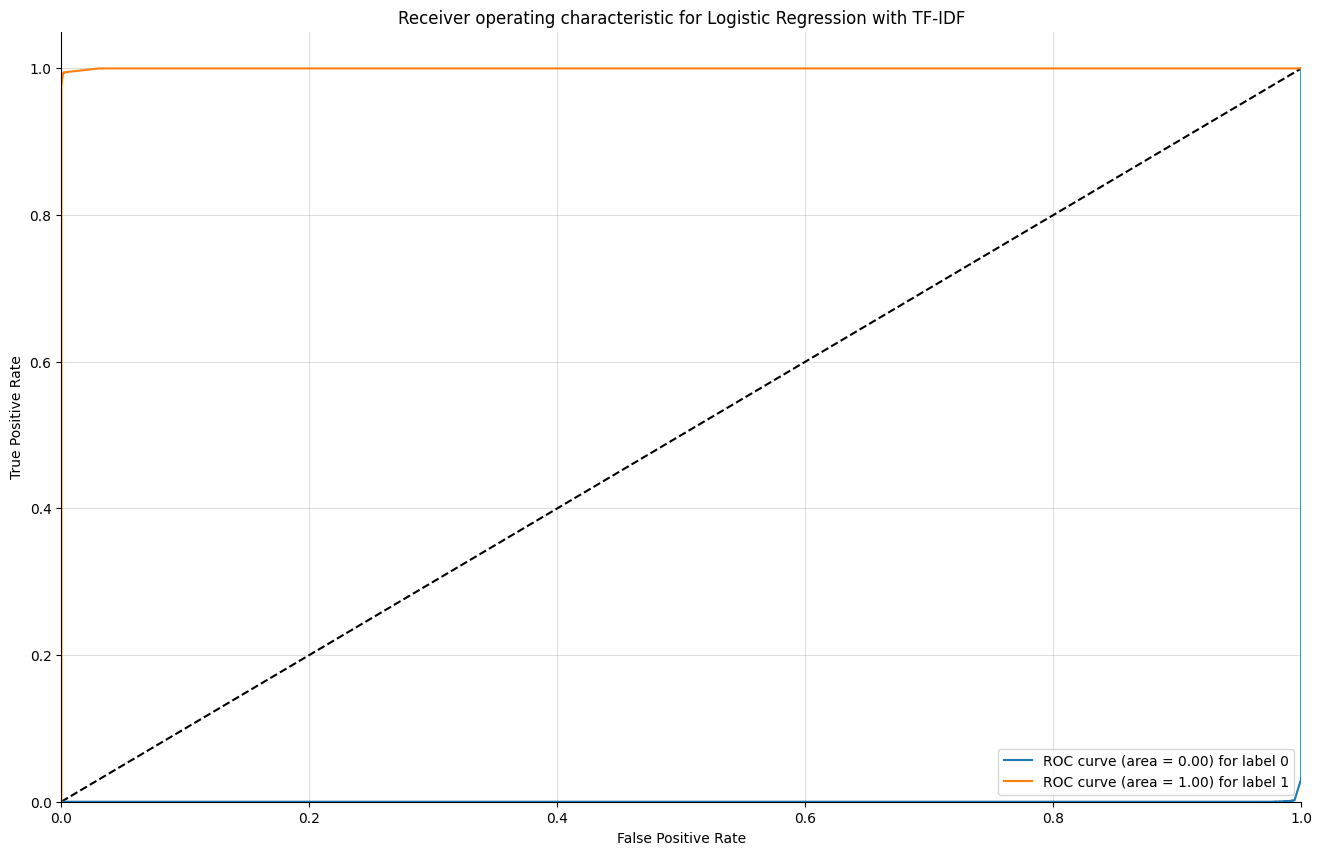

In [ ]:
plot_multiclass_roc("Logistic Regression", "TF-IDF", best_model_lr, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

### Ridge Classifier Grid Search

In [ ]:
# Ridge classifier object
model = RidgeClassifier()

param_grid = {'alpha' : np.arange(0, 1, 0.1),
              'solver' : ['lbfgs', 'sparse_cg', 'saga'],
              'max_iter' : [100, 500]
}

search = HalvingGridSearchCV(model, param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used only

Best: 0.919265 using {'alpha': 0.9, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'lbfgs'}
0.404255 (0.165219) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 100, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'lbfgs'}
0.404255 (0.165219) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.0, 'max_iter': 500, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
0.736170 (0.031125) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 100, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
0.736170 (0.031125) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'sparse_cg'}
nan (nan) with: {'alpha': 0.1, 'max_iter': 500, 'solver': 'saga'}
nan (nan) with: {'alpha': 0.2, 'max_iter': 100, 'solver': 'lbfgs'}
0

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.40425532        nan        nan 0.40425532        nan
        nan 0.73617021        nan        nan 0.73617021        nan
        nan 0.75319149        nan        nan 0.75319149        nan
        nan 0.77446809        nan        nan 0.77446809        nan
        nan 0.79787234        nan        nan 0.79787234        nan
        nan 0.8106383         nan        nan 0.8106383         nan
        nan 0.8212766         nan        nan 0.8212766         nan
        nan 0.82978723        nan        nan 0.82978723        nan
        nan 0.83829787        nan        nan 0.83829787        nan
        nan 0.84468085        nan        nan 0.84468085        nan
 0.51056338 0.51056338 0.81619718 0.81619718 0.83943662 0.83943662
 0.84577465 0.84577465 0.85915493 0.85915493 0.86338028 0.86338028
 0.86690141 0.86690141 0.87605634 0.87605634 0.87957746 

In [ ]:
best_model_rc = search.best_estimator_
best_model_rc

RidgeClassifier(alpha=0.9, max_iter=500, solver='sparse_cg')

In [ ]:
rc_train_score_halving = f1_score(tfidf_training_labels, best_model_rc.predict(tfidf_training_data), average= "macro")
rc_test_score_halving = f1_score(tfidf_val_labels, best_model_rc.predict(tfidf_val_data), average= "macro")
display(rc_train_score_halving)
display(rc_test_score_halving)

0.9541131867357868

0.8349078385855764

#### Compute ROC of the best performance

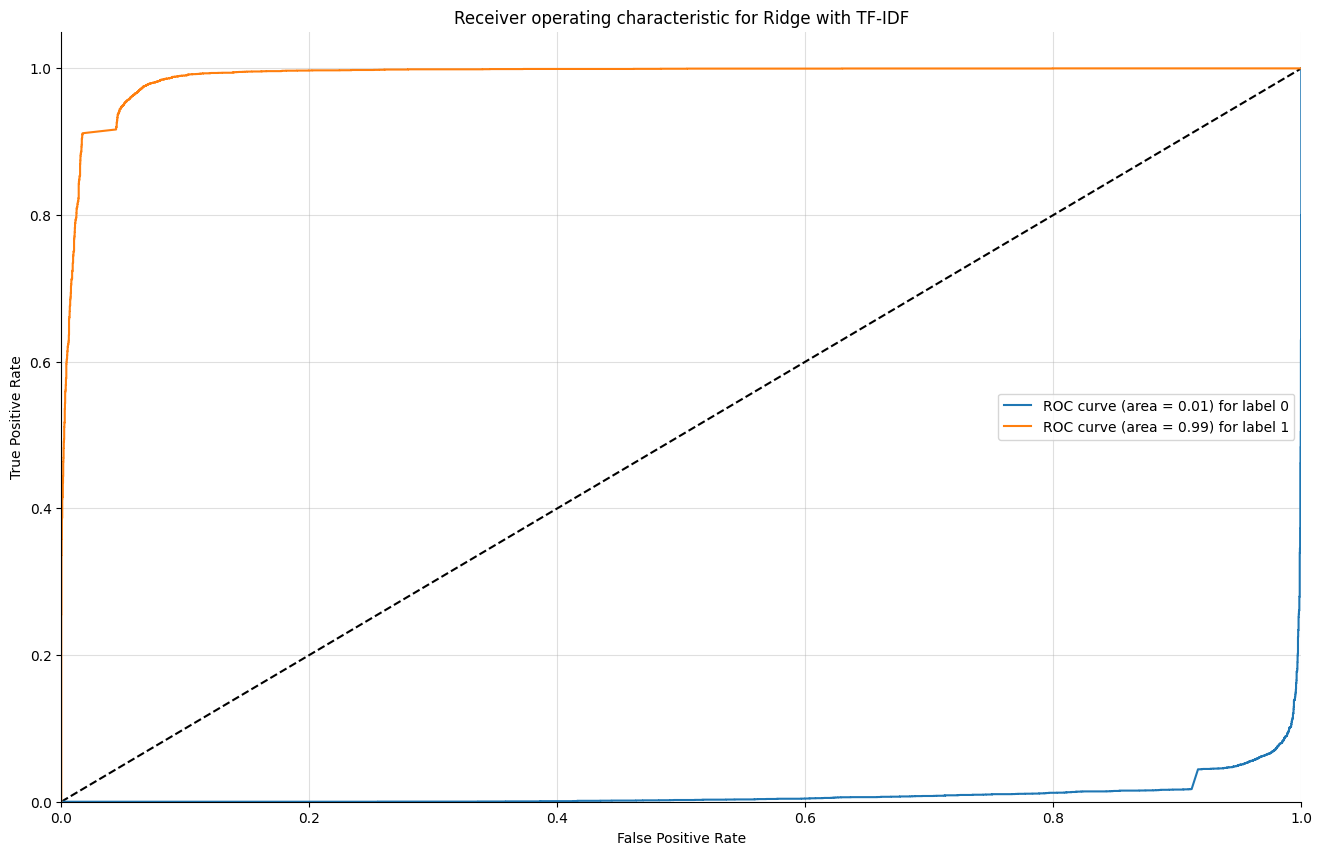

In [ ]:
plot_multiclass_roc("Ridge", "TF-IDF", best_model_rc, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

### Multinomial NB

In [ ]:
grid_params ={'alpha':[10**x for x in range(-4,4)]}
param_grid = {
              'alpha' : [math.log(x,10) for x in grid_params["alpha"]]
}

search = HalvingGridSearchCV(MultinomialNB(), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

Best: 0.938335 using {'alpha': 1.0}
nan (nan) with: {'alpha': -3.999999999999999}
nan (nan) with: {'alpha': -2.9999999999999996}
nan (nan) with: {'alpha': -1.9999999999999996}
nan (nan) with: {'alpha': -0.9999999999999998}
0.898242 (0.007392) with: {'alpha': 0.0}
0.917233 (0.006900) with: {'alpha': 1.0}
0.918640 (0.011308) with: {'alpha': 2.0}
0.919109 (0.012001) with: {'alpha': 2.9999999999999996}
0.938335 (0.005809) with: {'alpha': 1.0}
0.938101 (0.005327) with: {'alpha': 2.0}
0.938335 (0.004305) with: {'alpha': 2.9999999999999996}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.8982415  0.91723329
 0.91864009 0.91910903 0.93833529 0.93810082 0.93833529]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan 0.97309496 0.95128957
 0.94595545 0.94501758 0.95174839 0.95139676 0.95118187]
  warnings.warn(


In [ ]:
best_model_nb = search.best_estimator_
best_model_nb

MultinomialNB()

In [ ]:
nb_train_score_halving = f1_score(tfidf_training_labels, best_model_nb.predict(tfidf_training_data), average= "macro")
nb_test_score_halving = f1_score(tfidf_val_labels, best_model_nb.predict(tfidf_val_data), average= "macro")
display(nb_train_score_halving)
display(nb_test_score_halving)

0.9507748456824375

0.8990512080733106

#### Compute ROC of the best performance

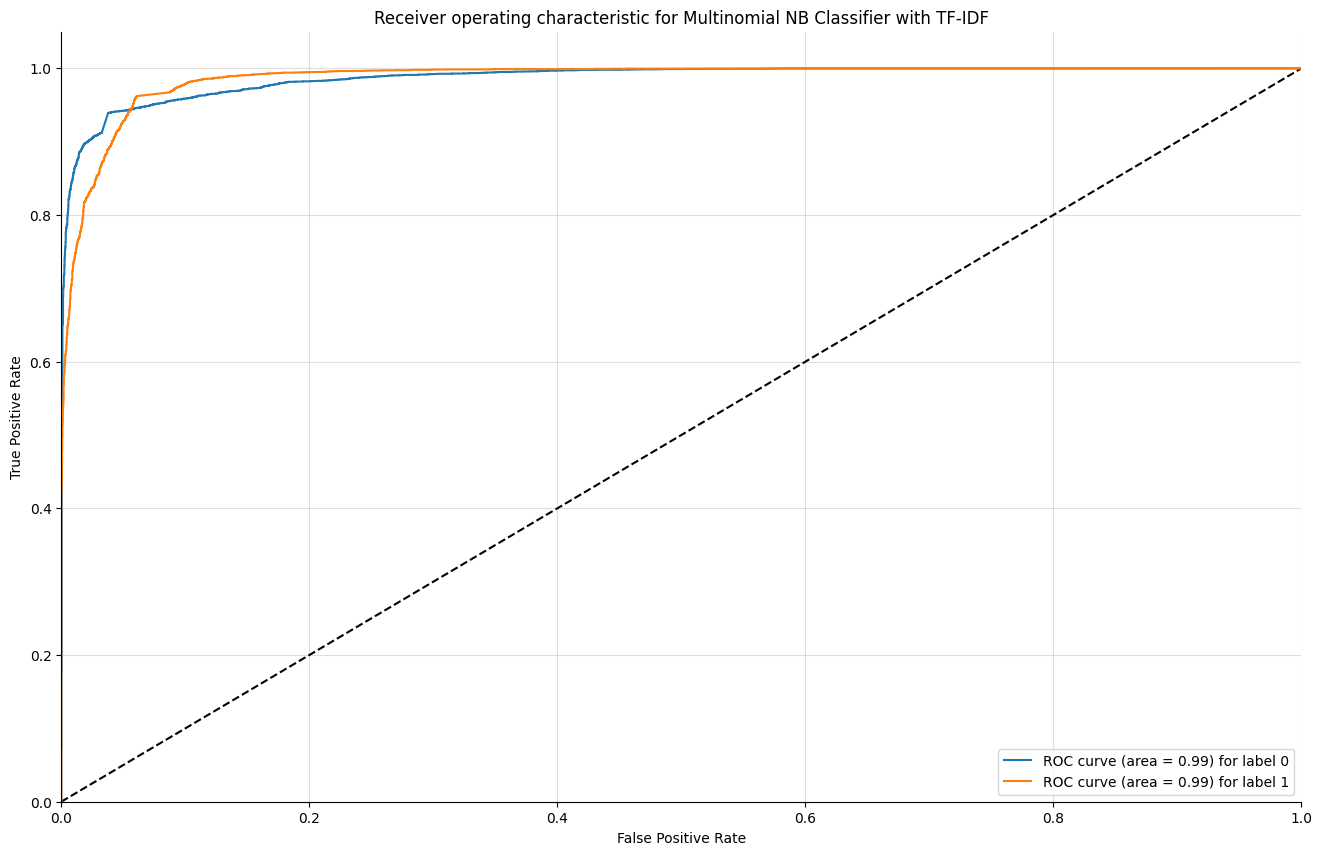

In [ ]:
plot_multiclass_roc("Multinomial NB", "TF-IDF", best_model_nb, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))

### SGD Grid Search

In [ ]:
alpha = [10**x for x in range(-4,4)]
penalty = ["l1","l2"]
params ={'alpha':alpha,'penalty':penalty}
alpha_log = [math.log(x,10) for x in params["alpha"]]

In [ ]:
search = HalvingGridSearchCV(SGDClassifier(), params, resource='n_samples', max_resources= 'auto', random_state=42).fit(tfidf_training_data, tfidf_training_labels)  
# Summarize results
print("Best: %f using %s" % (search.best_score_, search.best_params_))
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
params = search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.971551 using {'alpha': 0.0001, 'penalty': 'l2'}
0.897183 (0.020700) with: {'alpha': 0.0001, 'penalty': 'l1'}
0.890845 (0.021706) with: {'alpha': 0.0001, 'penalty': 'l2'}
0.916197 (0.035936) with: {'alpha': 0.001, 'penalty': 'l1'}
0.911268 (0.030486) with: {'alpha': 0.001, 'penalty': 'l2'}
0.834507 (0.082997) with: {'alpha': 0.01, 'penalty': 'l1'}
0.823239 (0.079030) with: {'alpha': 0.01, 'penalty': 'l2'}
0.485915 (0.017816) with: {'alpha': 0.1, 'penalty': 'l1'}
0.726761 (0.174438) with: {'alpha': 0.1, 'penalty': 'l2'}
0.485915 (0.017816) with: {'alpha': 1, 'penalty': 'l1'}
0.692958 (0.214845) with: {'alpha': 1, 'penalty': 'l2'}
0.494366 (0.022001) with: {'alpha': 10, 'penalty': 'l1'}
0.504930 (0.020604) with: {'alpha': 10, 'penalty': 'l2'}
0.514085 (0.017816) with: {'alpha': 100, 'penalty': 'l1'}
0.497183 (0.022535) with: {'alpha': 100, 'penalty': 'l2'}
0.497183 (0.022535) with: {'alpha': 1000, 'penalty': 'l1'}
0.502817 (0.022535) with: {'alpha': 1000, 'penalty': 'l2'}
0.809379

In [ ]:
best_model_sgd = search.best_estimator_
best_model_sgd

SGDClassifier()

In [ ]:
sgd_train_score_halving = f1_score(tfidf_training_labels, best_model_sgd.predict(tfidf_training_data), average= "macro")
sgd_test_score_halving = f1_score(tfidf_val_labels, best_model_sgd.predict(tfidf_val_data), average= "macro")
display(sgd_train_score_halving)
display(sgd_test_score_halving)

0.9780449773860154

0.9532914926539463

#### Compute ROC of the best performance

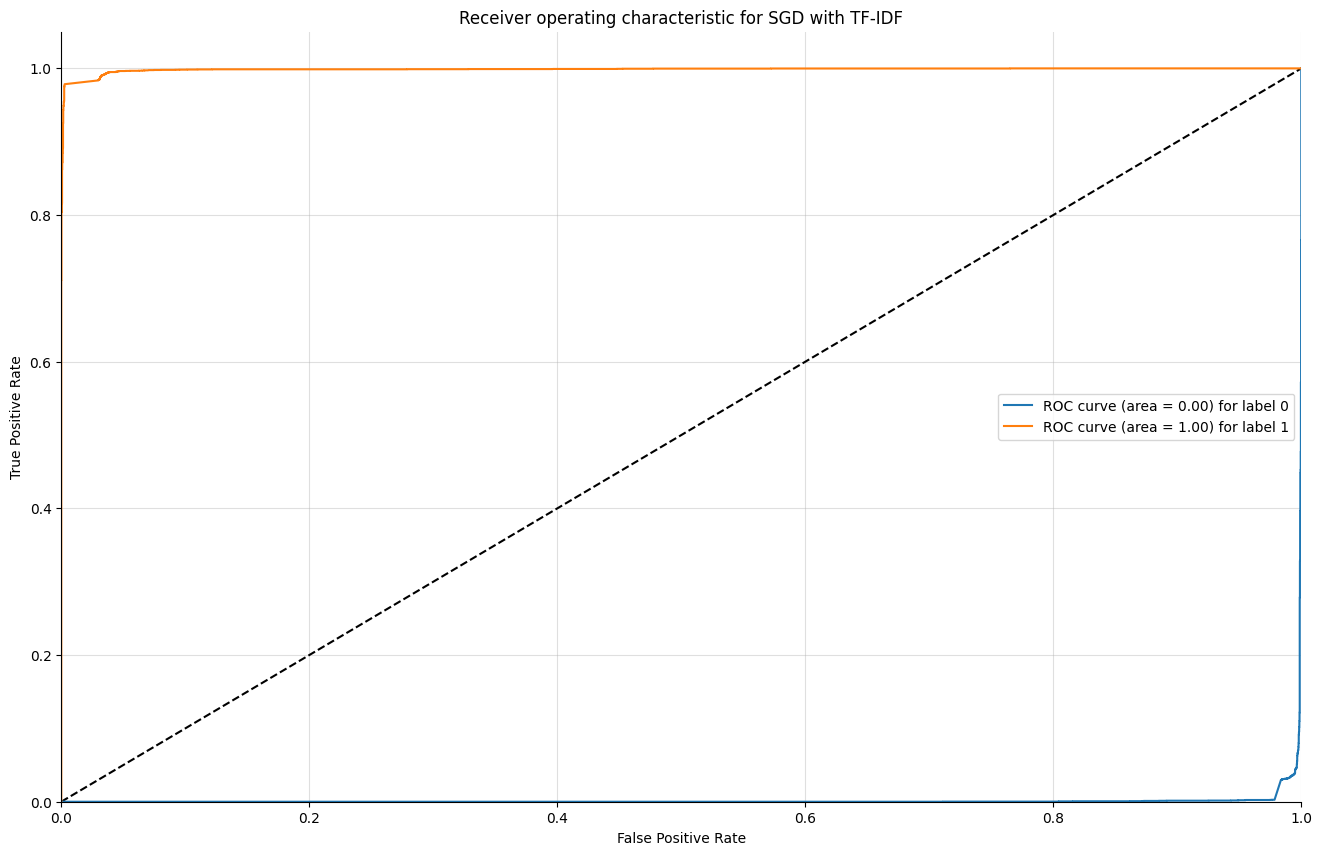

In [ ]:
plot_multiclass_roc("SGD", "TF-IDF", best_model_sgd, tfidf_training_data, tfidf_training_labels, n_classes=2, figsize=(16, 10))